## **Import Libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

#Train/Test/Split
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

#Sklearn libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

#Show all columns and randomize the row display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [ ]:
#mount and connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Import dataset "used_cars_data.csv"
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/used_cars_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Preprocessing, EDA, and Univariate/Multivariate Analysis**

In [ ]:
#Sample of (10) rows
data.sample(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1106,1106,BMW 5 Series 2013-2017 525d Luxury Line,Bangalore,2013,58500,Diesel,Automatic,Second,17.09 kmpl,1995 CC,218 bhp,5.0,67.870,27.50
5526,5526,Ford Ecosport 1.5 DV5 MT Titanium Optional,Mumbai,2017,30000,Diesel,Manual,First,22.7 kmpl,1498 CC,89.84 bhp,5.0,11.685,8.75
1746,1746,Maruti Wagon R AMT VXI Option,Jaipur,2015,34000,Petrol,Automatic,First,20.51 kmpl,998 CC,67 bhp,5.0,5.510,3.85
2634,2634,Hyundai Getz GLS ABS,Pune,2005,91000,Petrol,Manual,Third,16.8 kmpl,1341 CC,83 bhp,5.0,10.250,0.80
7029,7029,Hyundai i20 2015-2017 1.4 CRDi Sportz,Pune,2011,104500,Diesel,Manual,Second,23.0 kmpl,1396 CC,90 bhp,5.0,10.250,NaN
5845,5845,BMW 5 Series 525d Sedan,Mumbai,2013,35000,Diesel,Automatic,First,16.73 kmpl,2993 CC,218 bhp,5.0,67.870,21.00
2058,2058,Renault Duster Adventure Edition,Kochi,2015,75863,Diesel,Manual,First,19.01 kmpl,1461 CC,108.45 bhp,5.0,15.050,6.70
5750,5750,Nissan Terrano XL Plus ICC WT20 SE,Mumbai,2016,37000,Diesel,Manual,First,20.45 kmpl,1461 CC,83.8 bhp,5.0,16.650,6.50
4941,4941,Chevrolet Beat Diesel LT,Hyderabad,2012,61250,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,11.300,2.70
1779,1779,Mahindra XUV500 W8 2WD,Kochi,2014,70963,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,18.865,7.83


In [ ]:
#Number of rows and columns
print(f'Number of rows: {data.shape[0]} and Number of columns: {data.shape[1]}')

Number of rows: 7253 and Number of columns: 14


In [ ]:
#Review the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


The following dataset contains the following datatyps:

*   (3) float64
*   (3) int64
*   (8) object

The following columns are missing data:

*   Engine: .6% of values are missing
*   Power: 2.4% of values are missing
*   Milage: 0.003% of values are missing
*   Seats: 0.73% of values are missing
*   Price: 17% of values are missing

The S.No. column is identical to the index. This does not offer any additional value so we will drop this column.

In [ ]:
#Drop S.No. column
data.drop(['S.No.'], axis=1, inplace=True)
data.reset_index(inplace=True, drop=True)

In [ ]:
#Statistical analysis of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.00,10.0
New_Price,7253.0,21.307322,24.256314,3.91,7.88,11.30,21.69,375.0
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.0


**Year** 

*   Mean: 2013
*   Min: 1996
*   Max: 2019

<hr>

**Kilometers_Drive** 

*   Mean: 58699.06
*   Min: 171.00
*   Max: 6,500,000.00

<hr>

**Seats** 

*   Mean: 5.28
*   Min: 0.00
*   Max: 10.00

<hr>

**New_Price** 

*   Mean: 21.30
*   Min: 3.91
*   Max: 375.00

<hr>

**Price** 

*   Mean: 9.48
*   Min: 0.44
*   Max: 160.00

In [ ]:
#Shape of data
data.shape

(7253, 13)

There are 7,253 rows and 13 colums after dropping S. Number.

In [ ]:
#Check for duplicates
data.duplicated().sum()

1

There are (3) duplicated entries in the dataset. We can deop these.

In [ ]:
#Dropping duplicated rows
data.drop_duplicates(keep ='first',inplace = True)

In [ ]:
#Confirm duplicated are removed
data.duplicated().sum()

0

There are 7,250 rows and 13 colums as of now.

***Name***

The name column contains both the make and model. We will extract these by make and discard the model.

In [ ]:
#Create a new column of make by separating it from the name
data['Make'] = data['Name'].str.split(' ').str[0]

In [ ]:
#Check datatype
data['Make'].dtype

dtype('O')

Lest convert this to datatype category.

In [ ]:
#Convert make column from object to category
data['Make'] = data['Make'].astype('category', errors = 'raise')

In [ ]:
#Confirm datatype
data['Make'].dtype

CategoricalDtype(categories=['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet',
                  'Datsun', 'Fiat', 'Force', 'Ford', 'Hindustan', 'Honda',
                  'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar', 'Jeep', 'Lamborghini',
                  'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini',
                  'Mitsubishi', 'Nissan', 'OpelCorsa', 'Porsche', 'Renault',
                  'Skoda', 'Smart', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
, ordered=False)

In [ ]:
#How many values for each make
pd.DataFrame(data[['Make']].value_counts(ascending=False))

,0
Make,
Maruti,1444
Hyundai,1340
Honda,742
Toyota,507
Mercedes-Benz,380
Volkswagen,374
Ford,351
Mahindra,331
BMW,312


In [ ]:
#Number of unique makes
data["Make"].nunique()

33

We see there are two categories for Isuzu so we will consolidate this into one.

In [ ]:
#Consolidate make Isuzu into one category
data.loc[data['Make'] == 'ISUZU','Make'] = 'Isuzu'
data['Make']= data['Make'].cat.remove_categories('ISUZU')

In [ ]:
#Number of unique makes
data["Make"].nunique()

32

There are now 32 unique makes.

In [ ]:
#Check for missing values in make column
data['Make'].isnull().sum()

0

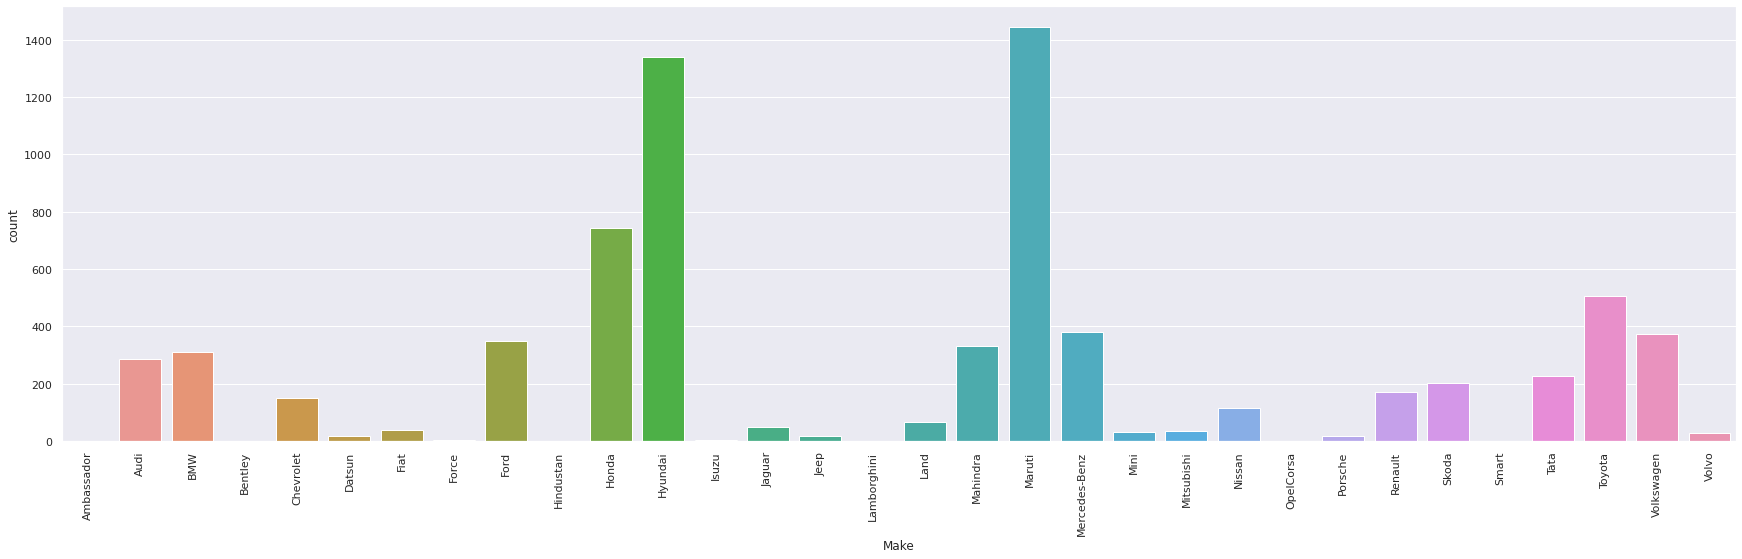

In [ ]:
#Countplot of the make column
plt.figure(figsize = (30,8))
ax = sns.countplot(x = 'Make', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

The top (5) makes are:

*   Maruti: 1404
*   Hyundai: 1284
*   Honda: 734
*   Toyota: 481
*   Mercedes-Benz: 378

We will now drop the name column as there is quite a bit of text and we have extracted the make.

In [ ]:
#Dropping name column
data.drop(['Name'], axis = 1, inplace=True)
data.reset_index(inplace=True, drop=True)

***Price***

In [ ]:
#Missing data for price
data['Price'].isnull().sum()

1233

We will fill all the missing values with the median car price.

In [ ]:
#Replace NaN values in the price column with the median
data['Price'] = pd.DataFrame(data['Price'].fillna(int(data['Price'].median())))

In [ ]:
#Confirm missing data for price has been replaced by the median
data['Price'].isnull().sum()

0

In [ ]:
#Check datatype of price
data['Price'].dtypes

dtype('float64')

In [ ]:
#Review the price breakdown
pd.set_option('display.max_rows', 10)
pd.DataFrame(data['Price'].value_counts(ascending=False))

,Price
5.00,1280
4.50,88
5.50,84
3.50,82
4.25,73
...,...
11.62,1
43.60,1
19.05,1
3.94,1


1,281 cars priced at 5.00 which is the most common price in the column. We will now evaluate the price based on make.



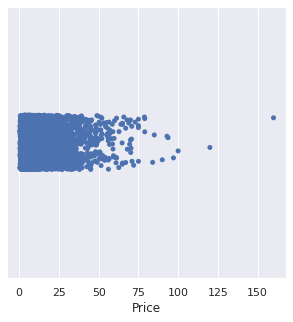

In [ ]:
#Stripplot of price
plt.figure(figsize = (5,5))
sns.stripplot(x = 'Price', data = data);

In [ ]:
#Statistical analysis of price
pd.DataFrame(data['Price']).describe().T

,count,mean,std,min,25%,50%,75%,max
Price,7252.0,8.71786,10.330388,0.44,3.85,5.0,8.4,160.0


Prices range from 0.44 - 160. The mean price is 8.72.

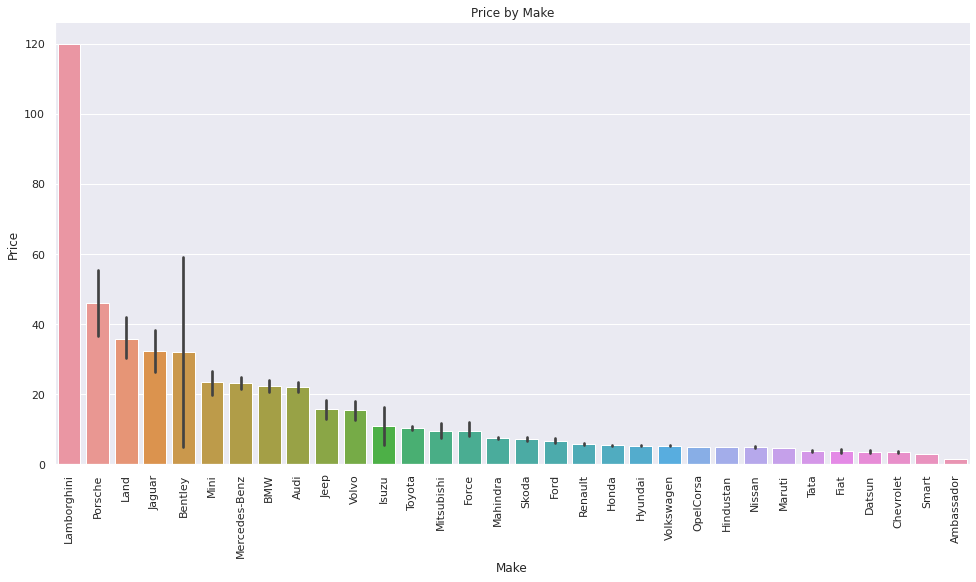

In [ ]:
#Average price of cars by make
avg_price = data.groupby(['Make'])['Price'].mean().fillna(0).sort_values(ascending= False).index
#catplot of make and price
sns.catplot(x = "Make", y = "Price", data = data, kind = 'bar', height = 7, aspect = 2, order = avg_price).set(title = 'Price by Make') 
plt.xticks(rotation=90);

The (5) most expensive in the price column by makes are as follows:

*   Lamborghini
*   Porshe
*   Land [Rover]
*   Jaguar
*   Bentley

<hr>

The (5) least expensive in the price column by makes are as follows:

*   Ambassador
*   Smart
*   Chevorlet
*   Datsun
*   Fiat

In [ ]:
#How many values for each make by price
pd.DataFrame(data[['Price','Make']].value_counts(ascending=False))

0
Price  Make           
5.00   Hyundai     244
       Maruti      240
       Honda       140
       Toyota      100
       Volkswagen   64
...                ...
6.40   Toyota        1
6.41   Ford          1
       Maruti        1
6.42   Ford          1
160.00 Land          1

[3171 rows x 1 columns]

***New Price***

In [ ]:
#Missing data for New_price
data['New_Price'].isnull().sum()

0

In [ ]:
#Check datatype of New_Price
data['New_Price'].dtypes

dtype('float64')

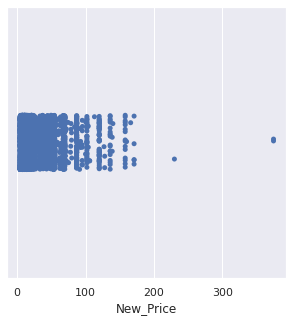

In [ ]:
#Stripplot of new_price
plt.figure(figsize = (5,5))
sns.stripplot(x = 'New_Price', data = data);

In [ ]:
#Review the new_price breakdown
pd.set_option('display.max_rows', 10)
pd.DataFrame(data['New_Price'].value_counts(ascending=False))

,New_Price
7.880,660
10.250,623
13.580,391
18.865,237
10.150,209
...,...
41.980,1
47.160,1
6.230,1
5.350,1


660 cars priced at 7.88 which is the most common new_price in the column. We will now evaluate the new_price based on make.

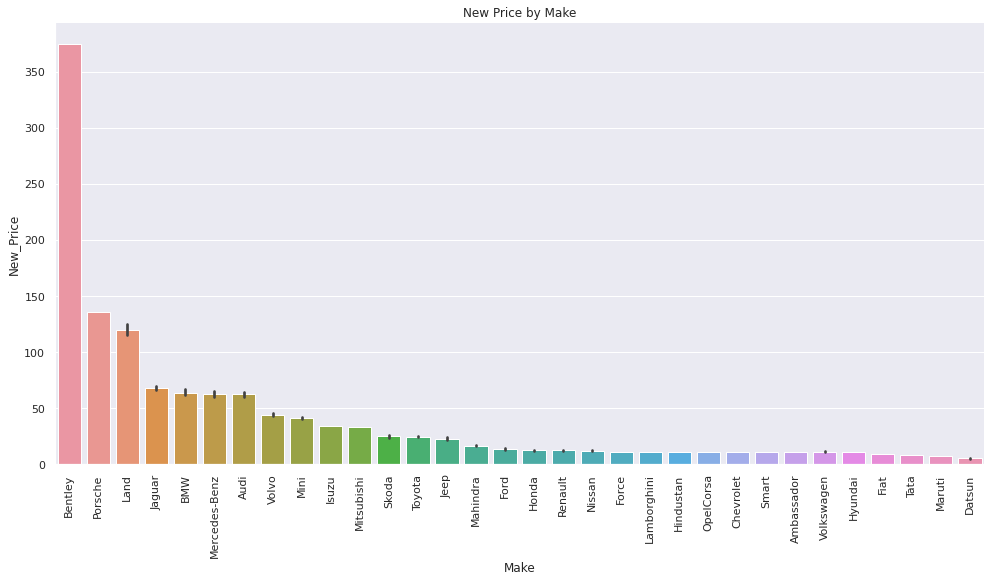

In [ ]:
#Average new price of cars by make
avg_new_price = data.groupby(['Make'])['New_Price'].mean().fillna(0).sort_values(ascending= False).index
#catplot of make and new price
sns.catplot(x = "Make", y = "New_Price", data = data, kind = 'bar', height = 7, aspect = 2, order = avg_new_price ).set(title = 'New Price by Make') 
plt.xticks(rotation=90);

The (5) most expensive in the new price column by makes are as follows:

*   Bentley
*   Porshe
*   Land [Rover]
*   Jaguar
*   BMW

<hr>

The (5) least expensive in the new price column by makes are as follows:

*   Datsun
*   Mauriti
*   Tata
*   Fiat
*   Hyundai


In [ ]:
#Review the new_price breakdown by make
pd.set_option('display.max_rows', 10)
pd.DataFrame(data[['New_Price', 'Make']].value_counts(ascending=False))

0
New_Price Make           
7.880     Maruti      644
10.250    Hyundai     623
13.580    Honda       390
18.865    Mahindra    237
10.150    Volkswagen  209
...                   ...
11.670    Hyundai       1
11.660    Volkswagen    1
          Maruti        1
11.630    Volkswagen    1
11.370    Maruti        1

[733 rows x 1 columns]

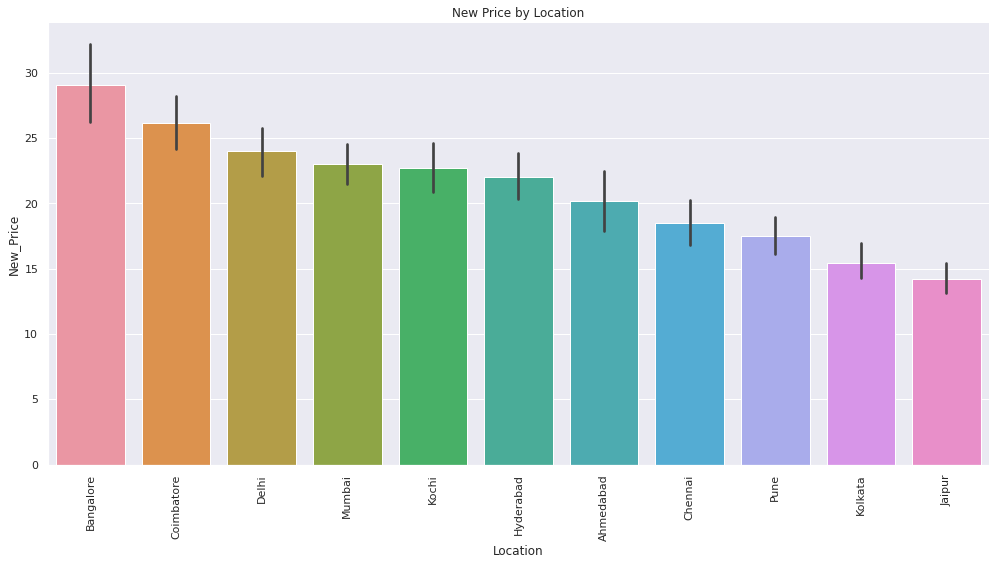

In [ ]:
#Average new price of cars by location
avg_new_price = data.groupby(['Location'])['New_Price'].mean().fillna(0).sort_values(ascending= False).index
#catplot of location and new price
sns.catplot(x = "Location", y = "New_Price", data = data, kind = 'bar', height = 7, aspect = 2, order = avg_new_price ).set(title = 'New Price by Location') 
plt.xticks(rotation=90);

The top locations by New_Price are:

*   Banglore
*   Coimbatore
*   Delhi



In [ ]:
#Review the new_price breakdown by make
pd.set_option('display.max_rows', 10)
pd.DataFrame(data[['New_Price', 'Location']].value_counts(ascending=False))

0
New_Price Location       
7.88      Hyderabad   107
          Pune         87
10.25     Kolkata      77
7.88      Jaipur       73
10.25     Pune         72
...                   ...
11.12     Jaipur        1
11.13     Coimbatore    1
11.14     Delhi         1
11.15     Mumbai        1
375.00    Hyderabad     1

[1430 rows x 1 columns]

Evaluate the correlation between price and new price.

In [ ]:
#Correlation between price and new price
data[['New_Price', 'Price']].corr()

,New_Price,Price
New_Price,1.000000,0.691113
Price,0.691113,1.000000


There is a moderate positive correlation (69%) between price and new price.

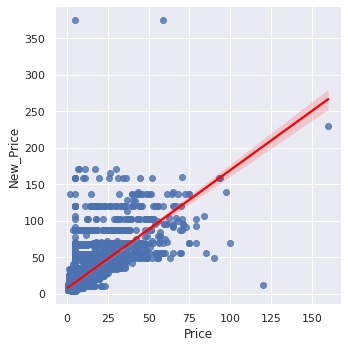

In [ ]:
#Lmplot of price and new price
sns.lmplot(x="Price", y="New_Price", data=data, line_kws={'color': 'red'});

***Transmission***

In [ ]:
#Missing data for transmission
data['Transmission'].isnull().sum()

0

In [ ]:
#Check datatype of transmission
data['Transmission'].dtypes

dtype('O')

Let's convert the datatype of transmission to category.

In [ ]:
#Convert Transmission column from object to category
data['Transmission'] = data['Transmission'].astype('category', errors = 'raise')

In [ ]:
#Check the new datatype for transmission
data['Transmission'].dtypes

CategoricalDtype(categories=['Automatic', 'Manual'], ordered=False)

<Figure size 576x576 with 0 Axes>

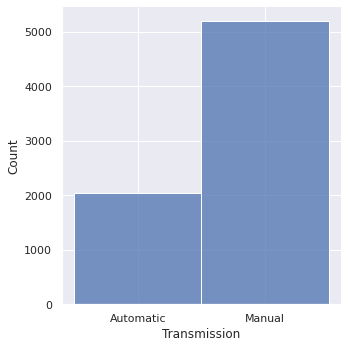

In [ ]:
#Displot of the transmission column
plt.figure(figsize = (8,8))
sns.displot(x = 'Transmission', data = data);

In [ ]:
#Specific value counts for each transmission types
pd.DataFrame(data['Transmission'].value_counts(ascending=False))

,Transmission
Manual,5203
Automatic,2049


71.8% of the cars are manual transmissions.

In [ ]:
#Create a dataframe of just manual transmissions
manual = data[data['Transmission'] == 'Manual']
manual.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,Maruti
5,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,10.25,2.35,Hyundai


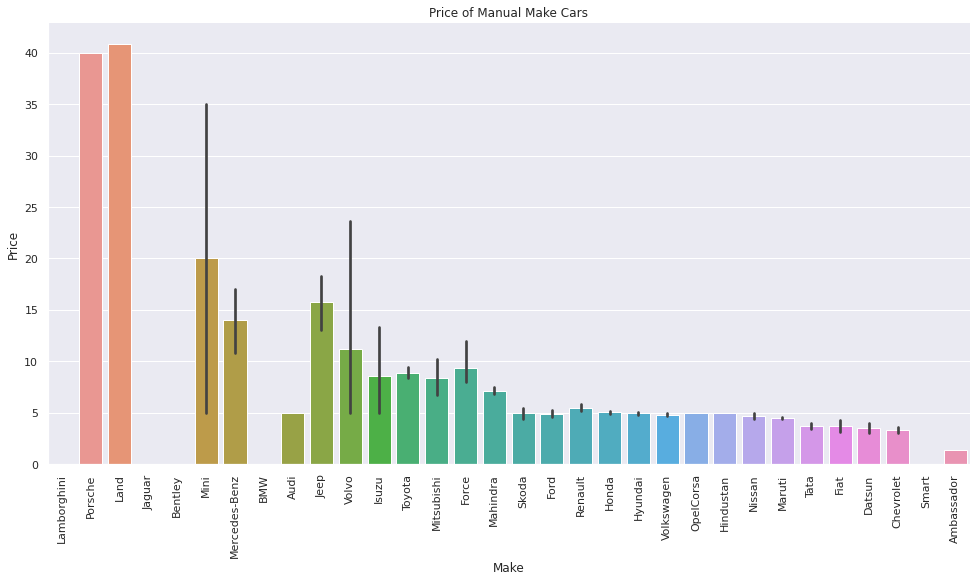

In [ ]:
#Average price of cars by make with manual transimissions
man_price = data.groupby(['Make'])['Price'].mean().fillna(0).sort_values(ascending= False).index
#catplot of make and price for all manual transmissions
sns.catplot(x = "Make", y = "Price", data = manual, kind = 'bar', height = 7, aspect = 2, order = man_price).set(title = 'Price of Manual Make Cars') 
plt.xticks(rotation=90);

The Land price is the highest for used manual transmission cars.

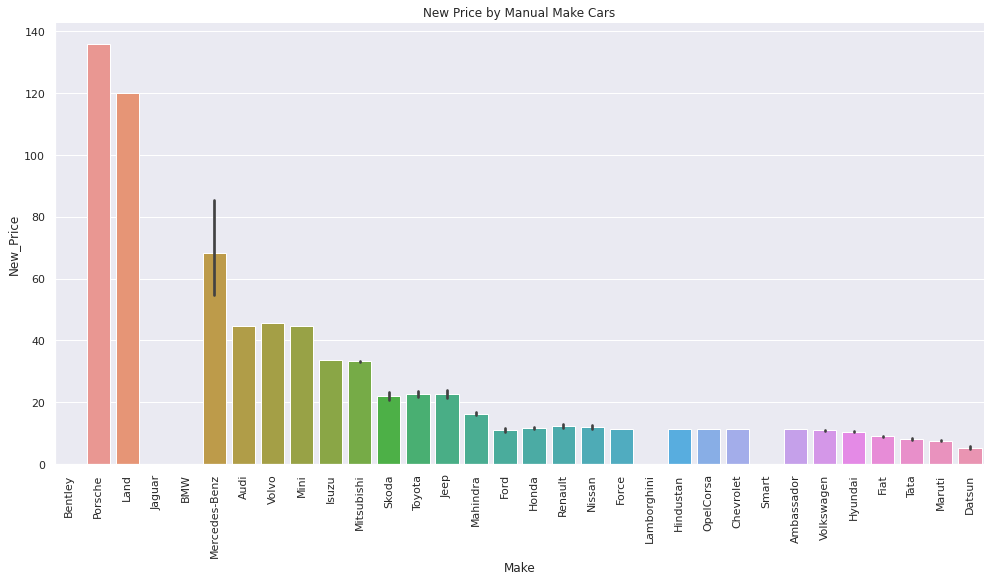

In [ ]:
#Average new price of cars by make with manual transimissions
man_cars = data.groupby(['Make'])['New_Price'].mean().fillna(0).sort_values(ascending= False).index
#catplot of make and price for all manual transmissions
sns.catplot(x = "Make", y = "New_Price", data = manual, kind='bar', height=7, aspect=2, order= man_cars).set(title = 'New Price by Manual Make Cars') 
plt.xticks(rotation=90);

Porsche is the highest new_price for manual transmission cars.

In [ ]:
#Differnce between the mean price and mean new price of manual cars
manual['Price'].mean()/manual['New_Price'].mean()

0.44293040433736347

The mean difference between the price and new_price of manual cars is 0.443

28% of the cars in the dataset are automatic transmissions.

In [ ]:
#Create a dataframe of just automatic transmissions
automatic = data[data['Transmission'] == 'Automatic']
automatic.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,Audi
7,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21.00,17.50,Toyota
11,Kolkata,2012,60000,Petrol,Automatic,First,16.8 kmpl,1497 CC,116.3 bhp,5.0,13.58,4.49,Honda
13,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,120.00,27.00,Land
14,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,120.00,17.50,Land


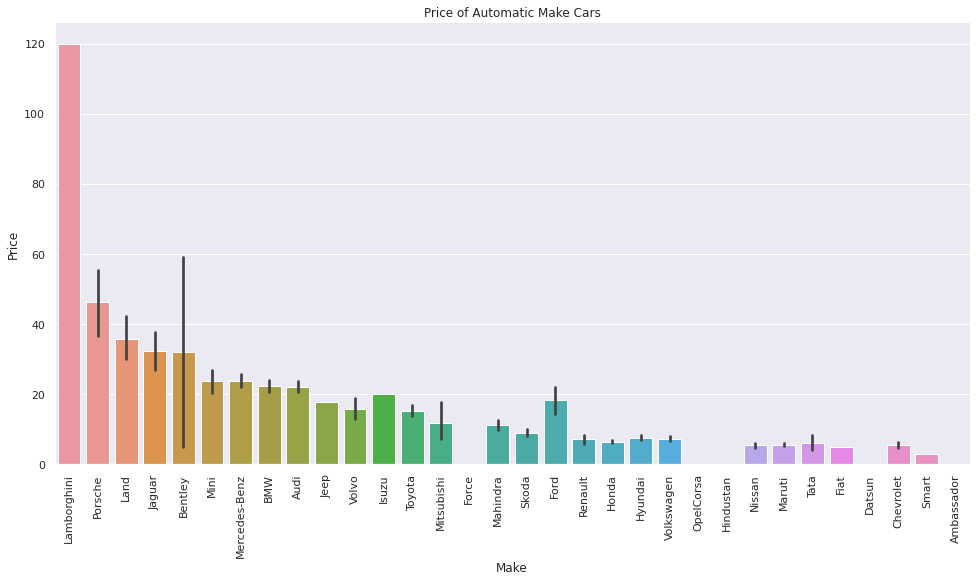

In [ ]:
#Average price of cars by make with automatic transmissions
auto_price = data.groupby(['Make'])['Price'].mean().fillna(0).sort_values(ascending= False).index
#catplot of make and price for all automatic transmissions
sns.catplot(x = "Make", y = "Price", data = automatic, kind = 'bar', height = 7, aspect = 2, order = auto_price).set(title = 'Price of Automatic Make Cars') 
plt.xticks(rotation=90);

The Lamborghini price is the highest for used automatic transmission cars.

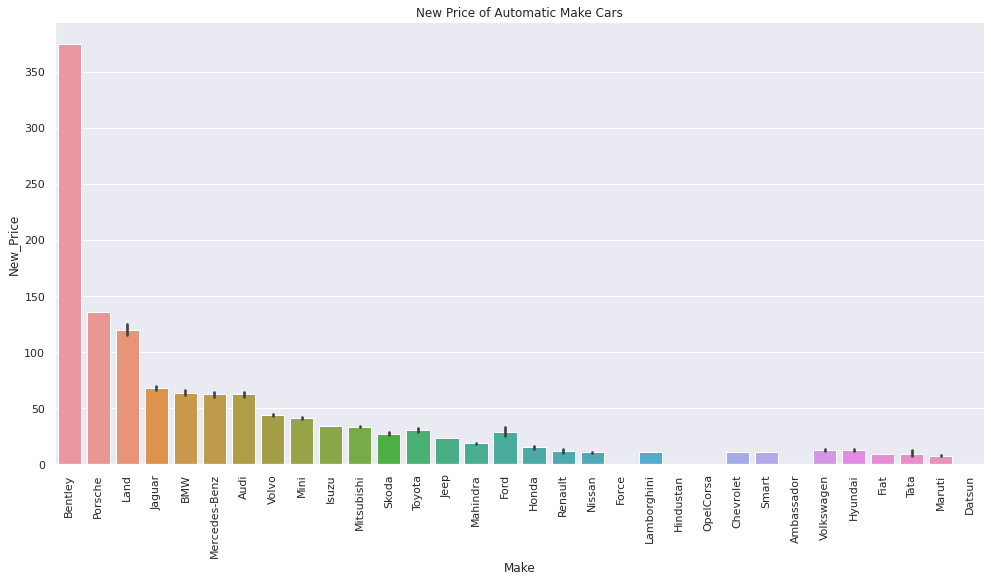

In [ ]:
#Average new price of cars by make automatic transmissions
new_auto = data.groupby(['Make'])['New_Price'].mean().fillna(0).sort_values(ascending= False).index
#catplot of make and new price for all automatic transmissions
sns.catplot(x = "Make", y = "New_Price", data = automatic, kind = 'bar', height = 7, aspect = 2, order = new_auto).set(title = 'New Price of Automatic Make Cars') 
plt.xticks(rotation=90);

The Bently new_price is the highest for new automatic transmission cars.

In [ ]:
#Differnce between the mean price and mean new price of automatic cars
automatic['Price'].mean()/automatic['New_Price'].mean()

0.38650094462900997

The mean difference between the price and new_price of manual cars is 0.387

***Fuel_Type***

In [ ]:
#Missing data for fuel type
data['Fuel_Type'].isnull().sum()

0

In [ ]:
#Check datatype of make
data['Fuel_Type'].dtypes

dtype('O')

In [ ]:
#Convert Fuel_Type column from object to category
data['Fuel_Type'] = data['Fuel_Type'].astype('category', errors = 'raise');

In [ ]:
#Check the new datatype for Fuel_Type
data['Fuel_Type'].dtypes

CategoricalDtype(categories=['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], ordered=False)

In [ ]:
#Specific value counts for each fuel type types
pd.DataFrame(data['Fuel_Type'].value_counts(ascending=False))

,Fuel_Type
Diesel,3852
Petrol,3324
CNG,62
LPG,12
Electric,2


*   53.1% of the cars are diesel fuel types
*   45.8% of cars are petrol fuel types

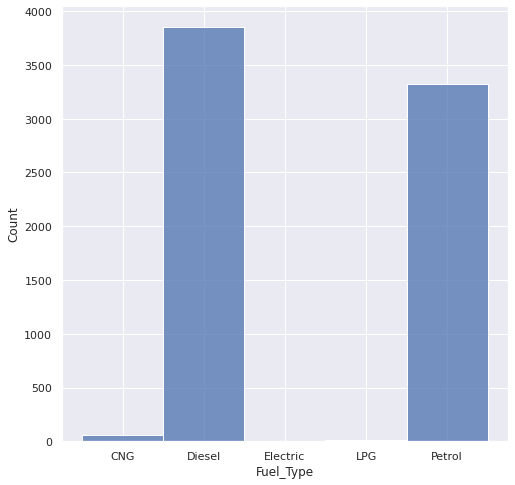

In [ ]:
#Hisplot of fuel_type
plt.figure(figsize = (8,8))
sns.histplot(x = 'Fuel_Type', data = data);

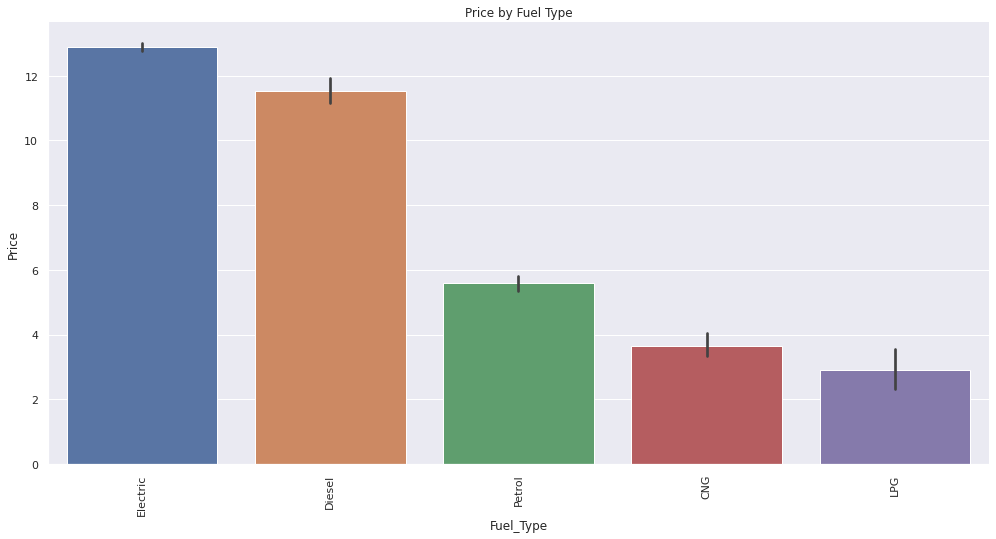

In [ ]:
#Average price of cars by fuel type
fuel = data.groupby(['Fuel_Type'])['Price'].mean().fillna(0).sort_values(ascending= False).index
#catplot of fuel type and price
sns.catplot(x="Fuel_Type", y="Price", data=data, kind='bar', height=7, aspect=2, order= fuel).set(title='Price by Fuel Type') 
plt.xticks(rotation=90);

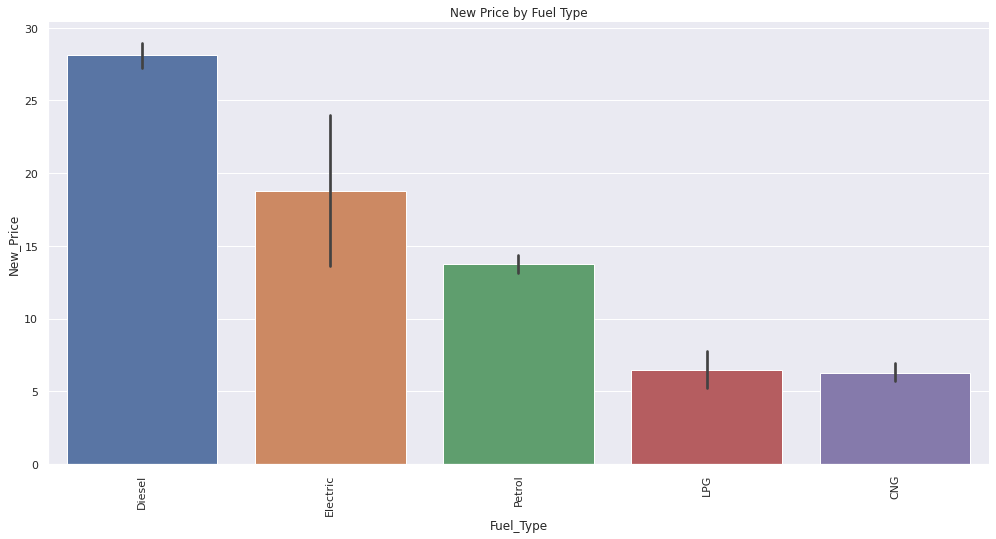

In [ ]:
#Average new price of cars by fuel type
x = data.groupby(['Fuel_Type'])['New_Price'].mean().fillna(0).sort_values(ascending= False).index
#catplot of fuel type and new price
sns.catplot(x="Fuel_Type", y="New_Price", data=data, kind='bar', height=7, aspect=2, order= x).set(title='New Price by Fuel Type') 
plt.xticks(rotation=90);

Diesel cars appear to be higher priced for new_price.

***Mileage***

In [ ]:
#Missing data for mileage
data['Mileage'].isnull().sum()

2

In [ ]:
#Mileage datatype
data['Mileage'].dtypes

dtype('O')

Since the mileage contains strings, we need to remove kmpl and km/kg from the values and covert the column to type float.

In [ ]:
#Remove trailing kmpl from mileage
data['Mileage'] = data['Mileage'].str.replace('kmpl', '')
data['Mileage'].head(10)

0    26.6 km/kg
1        19.67 
2         18.2 
3        20.77 
4         15.2 
5    21.1 km/kg
6        23.08 
7        11.36 
8        20.54 
9         22.3 
Name: Mileage, dtype: object

In [ ]:
#Remove trailing km/kg from mileage
data['Mileage'] = data['Mileage'].str.replace('km/kg', '')
data['Mileage'].head(10)

0     26.6 
1    19.67 
2     18.2 
3    20.77 
4     15.2 
5     21.1 
6    23.08 
7    11.36 
8    20.54 
9     22.3 
Name: Mileage, dtype: object

Now that we removed the string characters from the mileage rows, we will convert these to float datatype.

In [ ]:
#Convert mileage column from object to float
data['Mileage'] = data['Mileage'].astype(float, errors = 'raise')

In [ ]:
#Review mileage datatype
data['Mileage'].dtypes

dtype('float64')

In [ ]:
#Replace NaN values in the price column with the median
data['Mileage'] = pd.DataFrame(data['Mileage'].fillna(int(data['Mileage'].median())))

In [ ]:
#Missing data for mileage
data['Mileage'].isnull().sum()

0

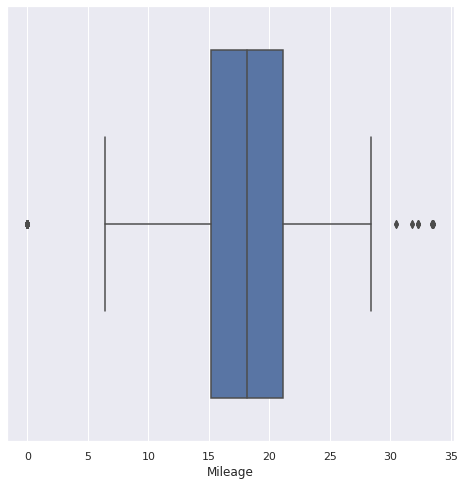

In [ ]:
#Boxplot of mileage
plt.figure(figsize = (8,8))
sns.boxplot(data = data, x = 'Mileage');

We see there are outliers at the 0 mileage. Let's evaluate these rows.

In [ ]:
#Evaluate mileage equal to 0
data[data['Mileage'] == 0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
14,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179 CC,115 bhp,5.0,120.000,17.50,Land
67,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950 CC,194 bhp,5.0,49.140,35.67,Mercedes-Benz
79,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086 CC,NaN,5.0,4.550,1.30,Hyundai
194,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,13.580,2.95,Honda
229,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498 CC,99 bhp,NaN,7.650,3.60,Ford
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6632,Kolkata,2016,27000,Diesel,Manual,First,0.0,NaN,NaN,NaN,18.865,5.00,Mahindra
6696,Jaipur,2007,85000,Petrol,Manual,Second,0.0,1086 CC,NaN,5.0,4.550,5.00,Hyundai
6856,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179 CC,115 bhp,5.0,120.000,5.00,Land
6956,Kochi,2019,11574,Petrol,Manual,First,0.0,1199 CC,88.7 bhp,NaN,9.600,5.00,Honda


In [ ]:
#Replacing 0 miles with median
data['Mileage'] = data['Mileage'].replace(0, data['Mileage'].median())

In [ ]:
#Evaluate mileage equal to 0
data[data['Mileage'] == 0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make


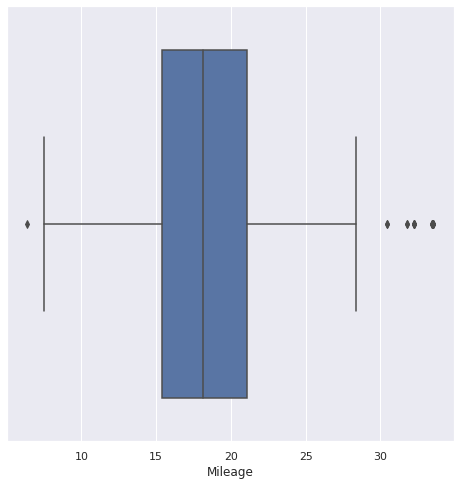

In [ ]:
#boxplot of mileage
plt.figure(figsize = (8,8))
sns.boxplot(data = data, x = 'Mileage');

In [ ]:
#Corrlation of mileage, price, and new price
data[['Mileage', 'Price', 'New_Price']].corr()

,Mileage,Price,New_Price
Mileage,1.000000,-0.298197,-0.431191
Price,-0.298197,1.000000,0.691113
New_Price,-0.431191,0.691113,1.000000


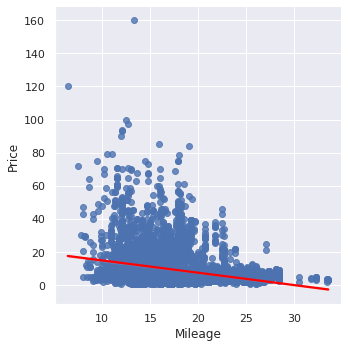

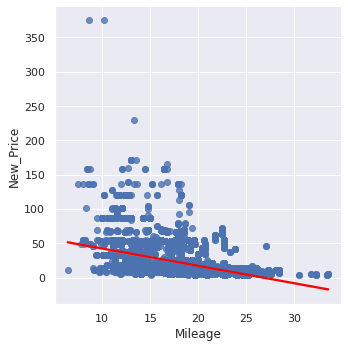

In [ ]:
#Lmplot of price and mileage
sns.lmplot(x="Mileage", y="Price", data=data, line_kws={'color': 'red'});
#Lmplot of new price and mileage
sns.lmplot(x="Mileage", y="New_Price", data=data, line_kws={'color': 'red'});

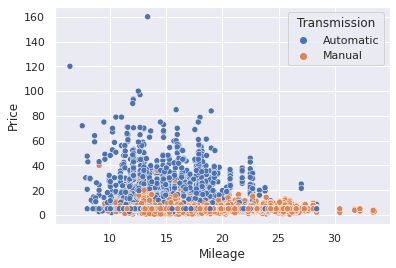

In [ ]:
#Scatterplot of mileage and price by transmission
sns.scatterplot(data=data, x='Mileage', y='Price', hue='Transmission');

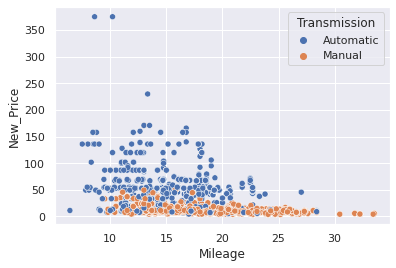

In [ ]:
#Scatterplot of mileage and new_price by transmission
sns.scatterplot(data=data, x='Mileage', y='New_Price', hue='Transmission');

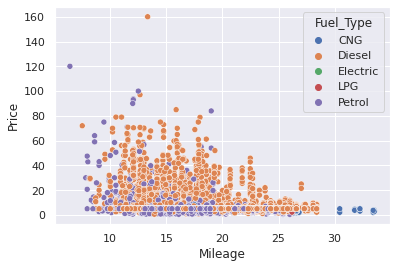

In [ ]:
#Scatterplot of mileage and price by fuel_type
sns.scatterplot(data=data, x='Mileage', y='Price', hue='Fuel_Type');

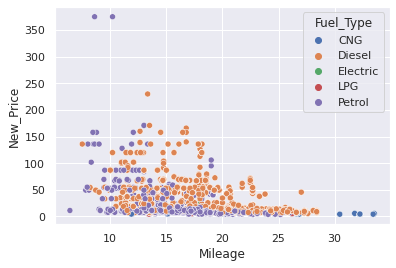

In [ ]:
#Scatterplot of mileage and new_price by fuel_type
sns.scatterplot(data=data, x='Mileage', y='New_Price', hue='Fuel_Type');

***Owner_Type***

In [ ]:
#Missing data for owner type
data['Owner_Type'].isnull().sum()

0

In [ ]:
#Datatype of owner column
data['Owner_Type'].dtypes

dtype('O')

In [ ]:
#Convert Owner_Type column from object to category
data['Owner_Type'] = data['Owner_Type'].astype('category', errors = 'raise')

In [ ]:
#Check the new datatype for Owner_Type
data['Owner_Type'].dtypes

CategoricalDtype(categories=['First', 'Fourth & Above', 'Second', 'Third'], ordered=False)

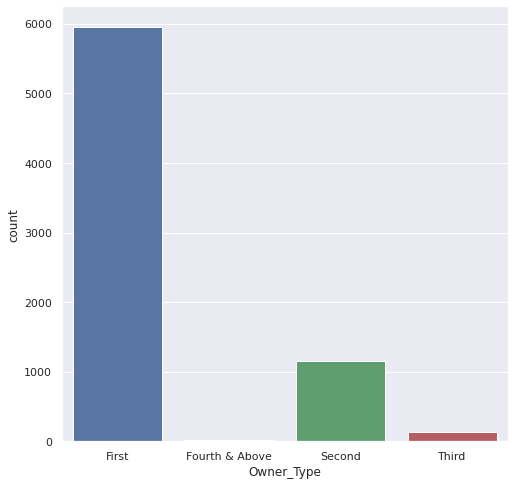

In [ ]:
#Countplot of owner_type
plt.figure(figsize = (8,8))
sns.countplot(data = data, x = 'Owner_Type');

There are (4) owner types: First (the most common), second, third, and Fourth and above, respectively.

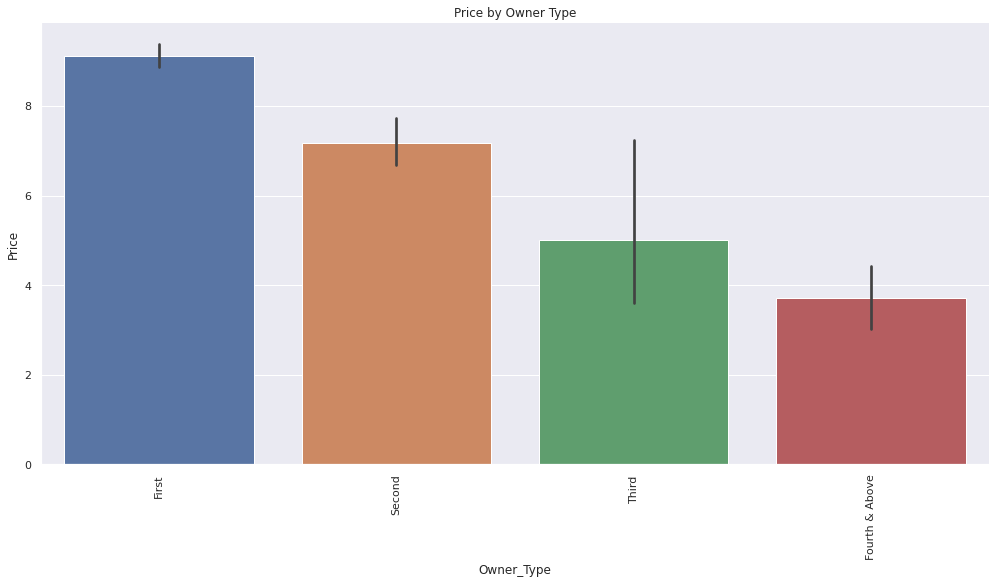

In [ ]:
#Average price of cars by owner type
owner_price = data.groupby(['Owner_Type'])['Price'].mean().fillna(0).sort_values(ascending= False).index
#catplot of owner type and price
sns.catplot(x = "Owner_Type", y = "Price", data = data, kind = 'bar', height = 7, aspect = 2, order= owner_price).set(title = 'Price by Owner Type') 
plt.xticks(rotation=90);

First owners have the highest price based on mean price of used cars.

***Engine***

In [ ]:
#Missing data for engine type
data['Engine'].isnull().sum()

46

There are 46 missing data points in the engine column.

In [ ]:
#Datatype of engine
data['Engine'].dtypes

dtype('O')

Since the engine contains strings, we need to remove CC from the values and covert the column to type float.

In [ ]:
#Remove trailing CC from engine
data['Engine'] = data['Engine'].str.replace('CC', '')
data['Engine'].sample(10)

572     1582 
5146    2967 
4411     998 
6432    1582 
2150    2179 
1429    1798 
4421    1798 
2491     796 
1822    1198 
5669    1582 
Name: Engine, dtype: object

In [ ]:
#Convert engine column from object to float
data['Engine'] = data['Engine'].astype(float, errors = 'raise')

In [ ]:
#Check the new datatype for engine
data['Engine'].dtypes

dtype('float64')

In [ ]:
#Return missing rows for engine
data[data.Engine.isnull()==True].head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
194,Ahmedabad,2007,60006,Petrol,Manual,First,18.16,NaN,NaN,NaN,13.58,2.95,Honda
208,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,7.88,2.11,Maruti
733,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,7.88,1.75,Maruti
749,Mumbai,2008,55001,Diesel,Automatic,Second,18.16,NaN,NaN,NaN,120.00,26.50,Land
1294,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,13.58,3.20,Honda


We will replace the 46 missing engine values with the median.

In [ ]:
#Replace NaN values in the engine column with the median
data['Engine'] = pd.DataFrame(data['Engine'].fillna(int(data['Engine'].median())))
data.reset_index(inplace=True, drop=True)

In [ ]:
#Return missing rows for engine
data[data.Engine.isnull()==True].head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make


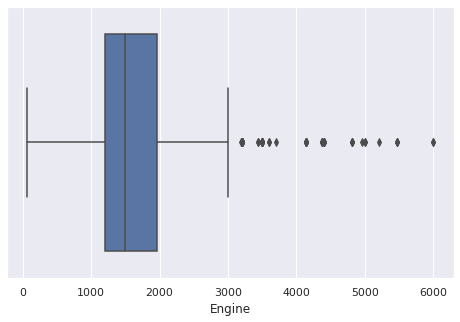

In [ ]:
#Boxplot of engine
plt.figure(figsize = (8,5))
sns.boxplot(data = data, x = 'Engine');

This boxplot shows that outliers exist in the engine data.

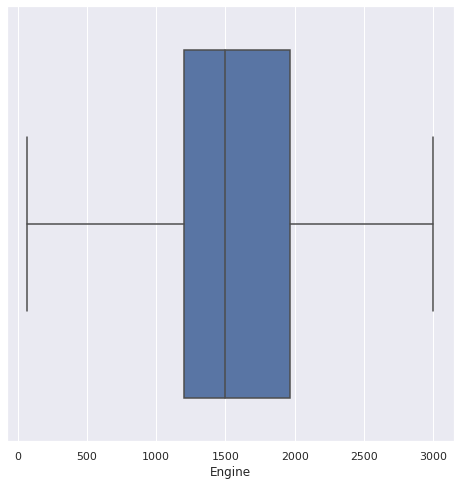

In [ ]:
#Boxplot of engine (outliers removed)
plt.figure(figsize = (8,8))
sns.boxplot(data = data, x = 'Engine', showfliers=False);

In [ ]:
#Correlation of engine, price, new price, and mileage
data[['Engine', 'Price', 'New_Price']].corr()

,Engine,Price,New_Price
Engine,1.000000,0.599802,0.692730
Price,0.599802,1.000000,0.691113
New_Price,0.692730,0.691113,1.000000


There is a moderate positive correlation between engine, price, and new price. There is a moderate negative coorelation between between engine and mileage.

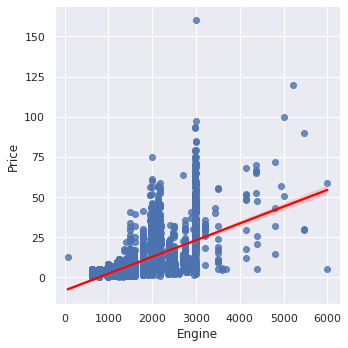

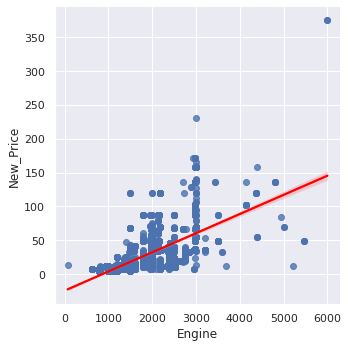

In [ ]:
#Lmplot of price and engine
sns.lmplot(x="Engine", y="Price", data=data, line_kws={'color': 'red'});
print('\n')
#Lmplot of new price and engine
sns.lmplot(x="Engine", y="New_Price", data=data, line_kws={'color': 'red'});

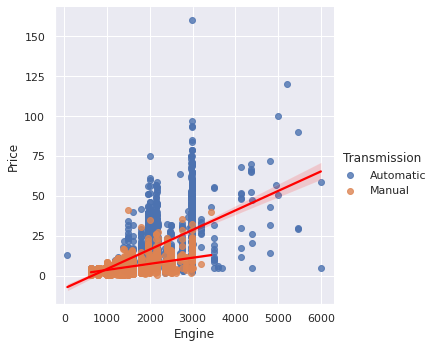

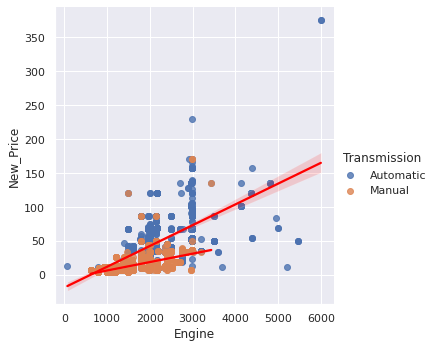

In [ ]:
#Lmplot of price and engine with hue Transmission
sns.lmplot(x="Engine", y="Price", hue='Transmission', data=data, line_kws={'color': 'red'});
#Lmplot of new price and engine with hue Transmission
sns.lmplot(x="Engine", y="New_Price", hue='Transmission', data=data, line_kws={'color': 'red'});

There is a higher positive correlation between engine and price with automatic transmissions as opposed to manual ones.

***Location***

In [ ]:
#Missing data for location
data['Location'].isnull().sum()

0

In [ ]:
#Datatype of location
data['Location'].dtypes

dtype('O')

We will now convert the location column to a category type.

In [ ]:
#Convert location column from object to category
data['Location'] = data['Location'].astype('category', errors = 'raise')

In [ ]:
#Datatype of location
data['Location'].dtypes

CategoricalDtype(categories=['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
                  'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'],
, ordered=False)

In [ ]:
#Review the number of cars sold broken down by location
pd.crosstab(index= data.Make, columns = data.Location.sort_values(ascending=False), margins=True, margins_name='Total_Sold')

Location,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Total_Sold
Make,,,,,,,,,,,,
Ambassador,0,0,1,0,0,0,0,0,0,0,0,1
Audi,13,40,11,56,31,38,7,33,17,30,9,285
BMW,18,30,29,41,24,37,7,33,14,53,26,312
Bentley,0,1,0,0,0,1,0,0,0,0,0,2
Chevrolet,3,9,17,16,3,12,12,18,19,16,26,151
...,...,...,...,...,...,...,...,...,...,...,...,...
Tata,10,10,26,25,8,34,25,12,20,15,43,228
Toyota,20,26,52,44,78,70,19,37,33,67,61,507
Volkswagen,12,17,43,35,21,45,22,28,45,62,44,374


Lets evaluate the number of cars sold by brand, broken down by location

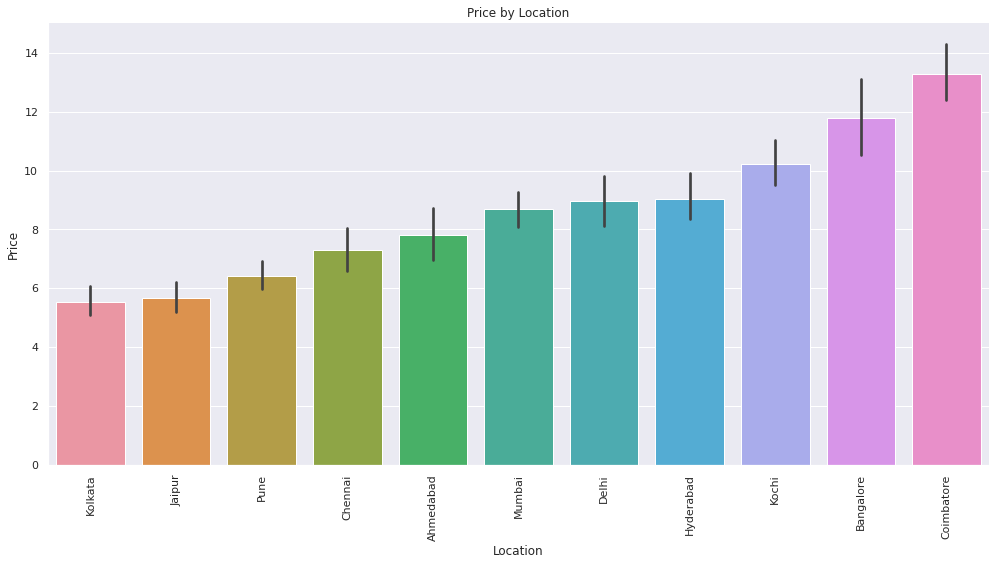

In [ ]:
#Average price of cars by location
location = data.groupby(['Location'])['Price'].mean().sort_values(ascending = True).index
#catplot of make and price for all manual transmissions
sns.catplot(x="Location", y="Price", data=data, kind='bar', height=7, aspect=2, order= location).set(title='Price by Location') 
plt.xticks(rotation=90);

Coimbatore, Banglore, and Kochi  are the locations with the highest price.

In [ ]:
#Cars for each make by mean price and location
pd.DataFrame(data.groupby(['Make', 'Location'])['Price'].mean())

Price
Make       Location         
Ambassador Ahmedabad     NaN
           Bangalore     NaN
           Chennai      1.35
           Coimbatore    NaN
           Delhi         NaN
...                      ...
Volvo      Jaipur        NaN
           Kochi       20.39
           Kolkata       NaN
           Mumbai      17.65
           Pune        14.90

[352 rows x 1 columns]

We will fill the NaN values with 0.0

In [ ]:
#Cars for each make by mean price and location
pd.DataFrame(data.groupby(['Make', 'Location'])['Price'].mean().fillna(0))

Price
Make       Location         
Ambassador Ahmedabad    0.00
           Bangalore    0.00
           Chennai      1.35
           Coimbatore   0.00
           Delhi        0.00
...                      ...
Volvo      Jaipur       0.00
           Kochi       20.39
           Kolkata      0.00
           Mumbai      17.65
           Pune        14.90

[352 rows x 1 columns]

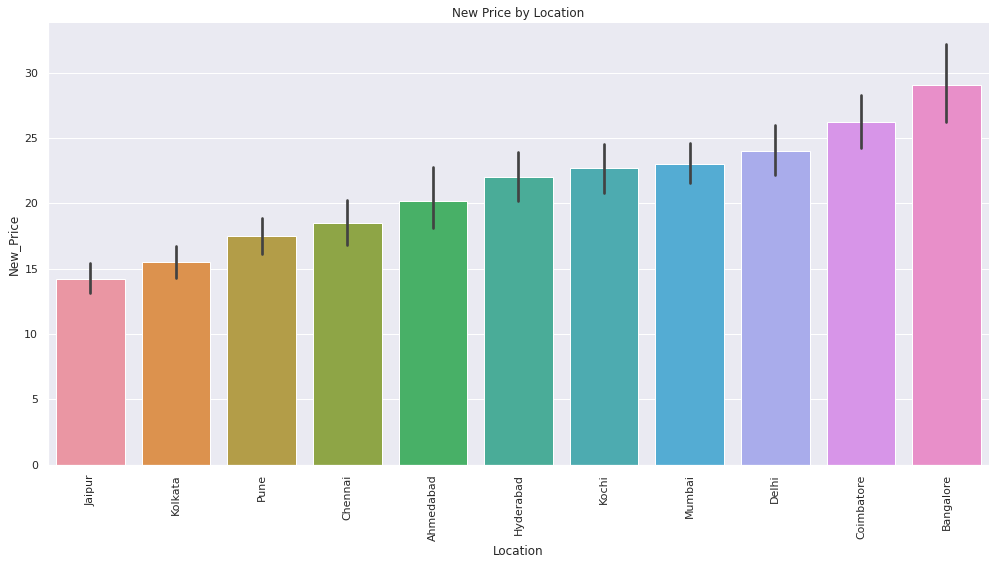

In [ ]:
#Average new price of cars by location
x = data.groupby(['Location'])['New_Price'].mean().sort_values(ascending = True).index
#catplot of location and new price 
sns.catplot(x="Location", y="New_Price", data=data, kind='bar', height=7, aspect=2, order= x).set(title='New Price by Location') 
plt.xticks(rotation=90);

Banglore, Coimbatore, and Delhi have the highest new_price.

In [ ]:
#How many values for each make by price by location
pd.DataFrame(data[['New_Price','Location']].value_counts(ascending=False))

0
New_Price Location       
7.88      Hyderabad   107
          Pune         87
10.25     Kolkata      77
7.88      Jaipur       73
10.25     Pune         72
...                   ...
11.12     Jaipur        1
11.13     Coimbatore    1
11.14     Delhi         1
11.15     Mumbai        1
375.00    Hyderabad     1

[1430 rows x 1 columns]

In [ ]:
#Cars for each make by mean new price and location
pd.DataFrame(data.groupby(['Make', 'Location'])['New_Price'].mean())

New_Price
Make       Location             
Ambassador Ahmedabad         NaN
           Bangalore         NaN
           Chennai        11.300
           Coimbatore        NaN
           Delhi             NaN
...                          ...
Volvo      Jaipur            NaN
           Kochi          45.670
           Kolkata           NaN
           Mumbai         45.670
           Pune           41.785

[352 rows x 1 columns]

We will fill the NaN values with 0.0

In [ ]:
#Cars for each make by mean new price and location
pd.DataFrame(data.groupby(['Make', 'Location'])['New_Price'].mean().fillna(0))

New_Price
Make       Location             
Ambassador Ahmedabad       0.000
           Bangalore       0.000
           Chennai        11.300
           Coimbatore      0.000
           Delhi           0.000
...                          ...
Volvo      Jaipur          0.000
           Kochi          45.670
           Kolkata         0.000
           Mumbai         45.670
           Pune           41.785

[352 rows x 1 columns]

***Year***

In [ ]:
#Missing data for year type
data['Year'].isnull().sum()

0

In [ ]:
#Number of unique values in the year column
data["Year"].dtypes

dtype('int64')

In [ ]:
#Bin the years
pd.options.mode.chained_assignment = None
data["Years_bin"] = pd.cut(data.loc[:, ("Year")],6, precision=0, labels=["Before 2000","2000-2004","2005-2007", "2008-2011", "2012-2015", "2016 or newer"])
data.sample(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Years_bin
6585,Coimbatore,2019,5752,Diesel,Manual,First,16.30,1956.0,170 bhp,5.0,27.560,5.00,Jeep,2016 or newer
2566,Kolkata,2014,45128,Diesel,Manual,First,12.05,2179.0,120 bhp,8.0,18.865,6.75,Mahindra,2012-2015
3396,Mumbai,2005,90000,Petrol,Manual,Second,15.30,1341.0,61 bhp,5.0,10.250,1.80,Hyundai,2005-2007
4255,Bangalore,2016,26000,Diesel,Automatic,Second,19.60,1461.0,108.45 bhp,5.0,15.050,10.00,Renault,2016 or newer
5224,Kochi,2013,76718,Diesel,Automatic,First,16.96,1968.0,138.03 bhp,5.0,10.150,6.51,Volkswagen,2012-2015
6220,Jaipur,2017,19678,Petrol,Manual,First,17.80,1497.0,117.3 bhp,5.0,13.580,5.00,Honda,2016 or newer
2786,Delhi,2013,66372,Diesel,Automatic,First,11.18,2696.0,184 bhp,7.0,18.865,10.50,Mahindra,2012-2015
4561,Coimbatore,2014,42083,Petrol,Manual,First,25.40,624.0,37.48 bhp,4.0,7.630,1.68,Tata,2012-2015
6198,Mumbai,2014,34000,Diesel,Automatic,First,15.26,2143.0,203.2 bhp,5.0,49.490,5.00,Mercedes-Benz,2012-2015
208,Kolkata,2010,42001,Petrol,Manual,First,16.10,1493.0,NaN,NaN,7.880,2.11,Maruti,2008-2011


In [ ]:
#Evaluate datatype of Years_bin
data['Years_bin'].dtypes

CategoricalDtype(categories=['Before 2000', '2000-2004', '2005-2007', '2008-2011',
                  '2012-2015', '2016 or newer'],
, ordered=True)

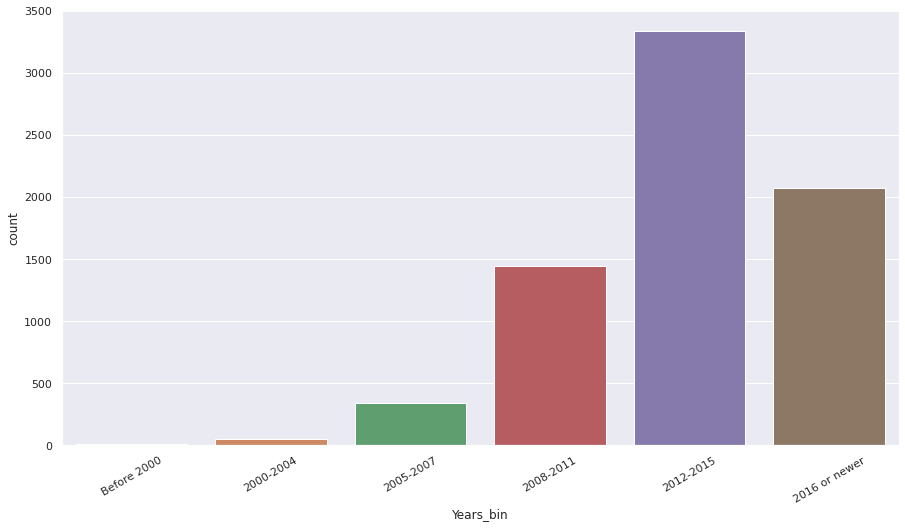

In [ ]:
#Countplot of year columns
plt.figure(figsize = (15,8))
ax = sns.countplot(x = 'Years_bin', data = data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

The most common years for cars in the dataset are bewteen 2012-2015.

In [ ]:
#How many values for each make by price by location
pd.DataFrame(data[['Years_bin']].value_counts(ascending=False))

,0
Years_bin,
2012-2015,3335
2016 or newer,2075
2008-2011,1444
2005-2007,340
2000-2004,51
Before 2000,7


*   46% of the cars are in the 2012-2015 year bin.
*   28.6% of the cars are 2016 or newer.
*   20% of the cars are in the 2008-2011 year bin.

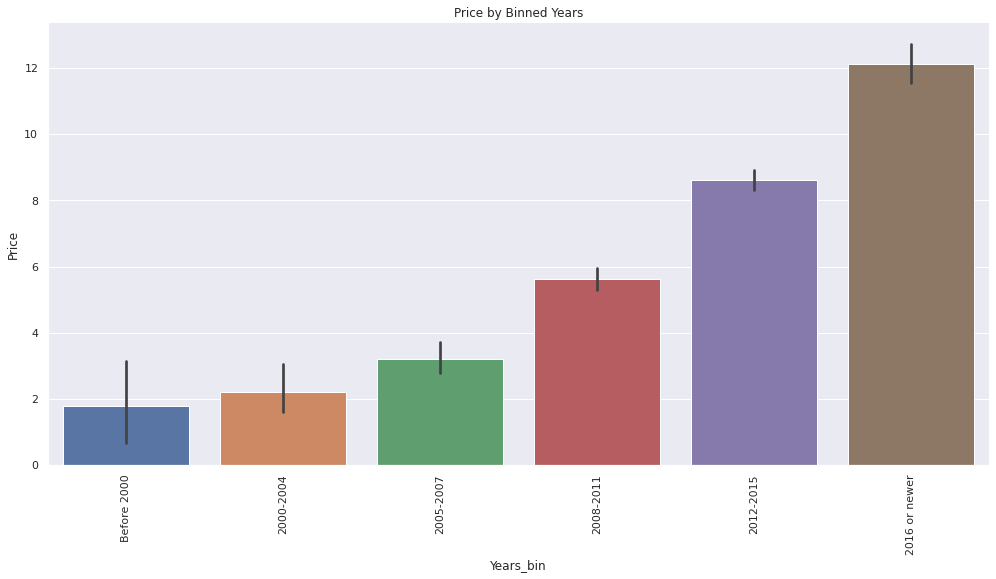

In [ ]:
#Catplot of binned years by price
binned_years = data.groupby(['Years_bin'])['Price'].mean().sort_values(ascending = True).index
sns.catplot(x="Years_bin", y="Price", data=data, kind='bar', height=7, aspect=2, order= binned_years).set(title='Price by Binned Years') 
plt.xticks(rotation=90);

The newer year used cars are always going to be more expensive.

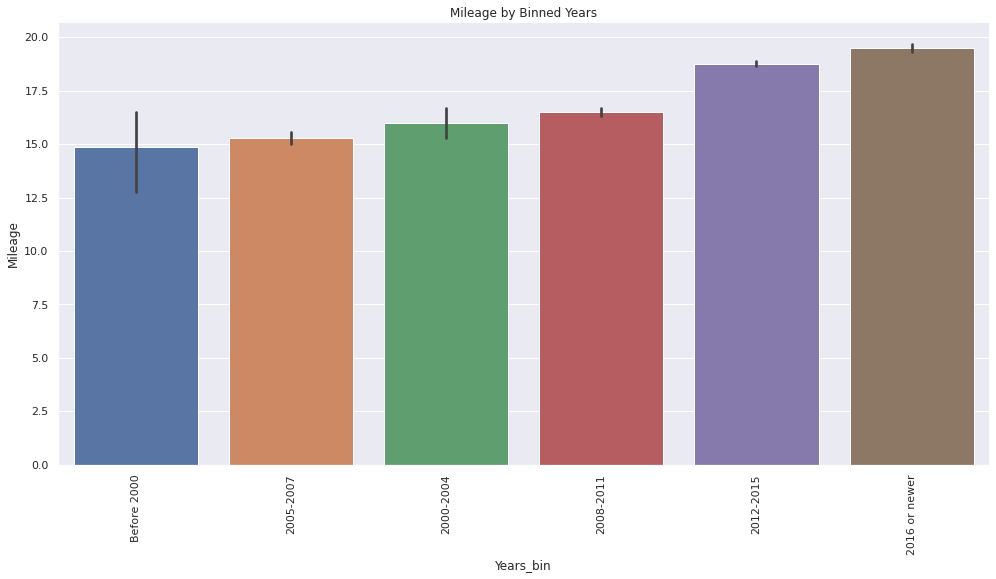

In [ ]:
#Catplot of binned years by mileage
bin_mileage = data.groupby(['Years_bin'])['Mileage'].mean().sort_values(ascending = True).index
sns.catplot(x="Years_bin", y="Mileage", data=data, kind='bar', height=7, aspect=2, order= bin_mileage).set(title='Mileage by Binned Years') 
plt.xticks(rotation=90);

Newer cars get better gas mileage.

***Power***

In [ ]:
#Missing data for power
data['Power'].isnull().sum()

175

In [ ]:
#Datatypes of power
data['Power'].dtypes

dtype('O')

We will remove the bhp string in the power column and convert the column to a float datatype.

In [ ]:
#Remove trailing bhp from power
data['Power'] = data['Power'].str.replace('bhp', '')
data['Power'].sample(10)

5607    138.03 
4407       118 
5406        70 
2639        82 
1370        75 
6335        73 
7053        80 
6566       100 
4382       170 
5608       180 
Name: Power, dtype: object

In [ ]:
#Convert power column from object to float
data['Power'] = data['Power'].astype(float, errors = 'raise')

In [ ]:
#Check the new datatype for power
data['Power'].dtypes

dtype('float64')

We will replace the 129 missing values in the power column with the median.

In [ ]:
#Replace NaN values in the power column with the median
data['Power'] = pd.DataFrame(data['Power'].fillna(int(data['Power'].median())))
data.reset_index(inplace=True, drop=True)

In [ ]:
#Confirm missing data for power has been converted to median
data['Power'].isnull().sum()

0

<Figure size 576x576 with 0 Axes>

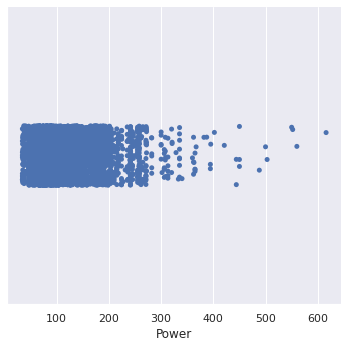

In [ ]:
#catplot of power
plt.figure(figsize = (8,8))
sns.catplot(data = data, x = 'Power');

In [ ]:
#Correlation of power, engine, price, new price, and mileage
data[['Power', 'Price', 'New_Price']].corr()

,Power,Price,New_Price
Power,1.000000,0.700494,0.793794
Price,0.700494,1.000000,0.691113
New_Price,0.793794,0.691113,1.000000


There is a high positive correlation between engine and power. Since power generally increases with the size of the engine, this makes sense. There is also a high positive corrleation bewteen both engine and price and engine and new price. There is a moderate negative corrleation bewteen engine and mileage. 

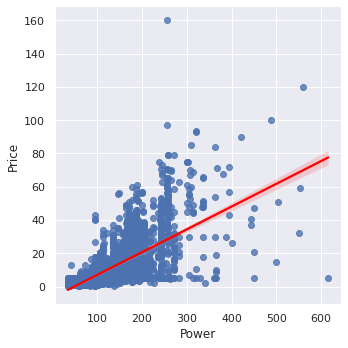

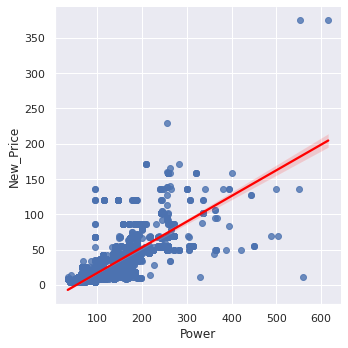

In [ ]:
#Lmplot of power and price
sns.lmplot(x="Power", y="Price", data=data, line_kws={'color': 'red'});
#Lmplot of power and new price
sns.lmplot(x="Power", y="New_Price", data=data, line_kws={'color': 'red'});

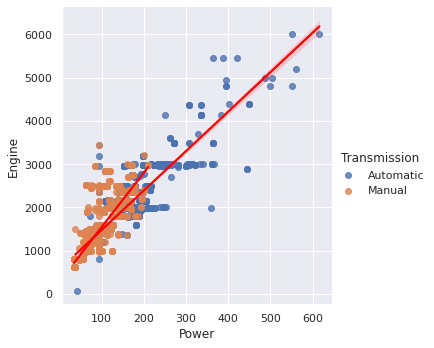

In [ ]:
#Lmplot of price and engine with hue Transmission
sns.lmplot(x="Power", y="Engine", hue='Transmission', data=data, line_kws={'color': 'red'});

The bigger the engine, the more power. Additinally, automatic transmission cars have more power than manual transmission cars.

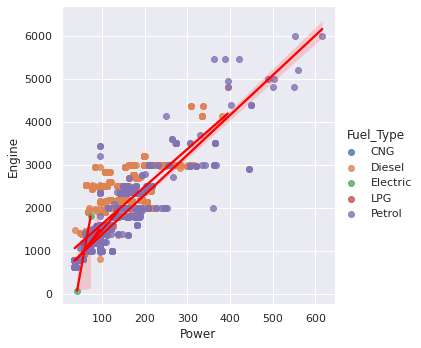

In [ ]:
#Lmplot of price and engine with hue Fuel Type
sns.lmplot(x="Power", y="Engine", hue='Fuel_Type', data=data, line_kws={'color': 'red'});

***Seats***

In [ ]:
#Missing data for seats
data['Seats'].isnull().sum()

53

In [ ]:
#Replace NaN values in the seats column with the median
data['Seats'] = pd.DataFrame(data['Seats'].fillna(int(data['Seats'].median())))
data.reset_index(inplace=True, drop=True)

In [ ]:
#Missing data for seats
data['Seats'].isnull().sum()

0

In [ ]:
#Datatypes of seats
data['Seats'].dtypes

dtype('float64')

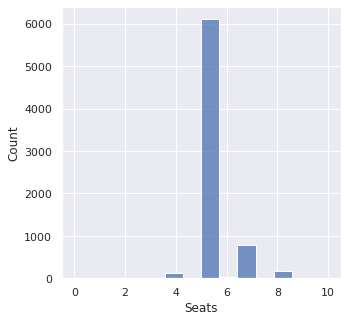

In [ ]:
#Histplot of seats
plt.figure(figsize = (5,5))
sns.histplot(x = 'Seats', data = data);

The majority of the cars in the dataset have 5 seats.

In [ ]:
#Correlation between seats, price, new price, engine, power, mileage
data[['Seats', 'Price', 'New_Price']].corr()

,Seats,Price,New_Price
Seats,1.000000,0.046897,0.036985
Price,0.046897,1.000000,0.691113
New_Price,0.036985,0.691113,1.000000


There is a negligable correlation between seats and price, new price, and power. There is a low positive correlation bewteen seats and power. There is a low negative correlation bewteen seats and mileage.

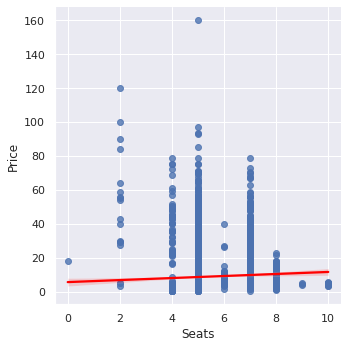

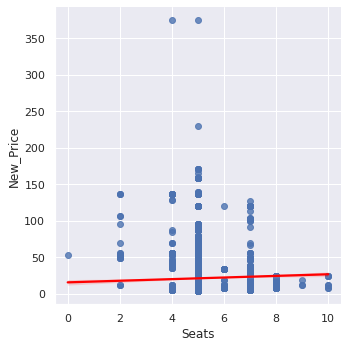

In [ ]:
#Lmplot of seats and price
sns.lmplot(x="Seats", y="Price", data=data, line_kws={'color': 'red'});
#Lmplot of seats and new price
sns.lmplot(x="Seats", y="New_Price", data=data, line_kws={'color': 'red'});

***Kilometers_Driven***

In [ ]:
#Missing data for seats
data['Kilometers_Driven'].isnull().sum()

0

In [ ]:
#Datatypes of kilometers driven
data['Kilometers_Driven'].dtypes

dtype('int64')

In [ ]:
#Correlation between seats, price, new price, engine, power, mileage, and kilometers driven
data[['Price', 'New_Price','Kilometers_Driven']].corr()

,Price,New_Price,Kilometers_Driven
Price,1.000000,0.691113,-0.011003
New_Price,0.691113,1.000000,0.015497
Kilometers_Driven,-0.011003,0.015497,1.000000


There are no significatnt correlations with kilometers driven.

We have dealt with all missing data and ran some EDA visualizations. We will now address the outliers identified for all continuous data.

In [ ]:
#Function to identify the outliers
def outliers(data, col):
    print(col)
    quartiles = np.quantile(data[col][data[col].notnull()], [.25, .75])
    col_4iqr = 4 * (quartiles[1] - quartiles[0])
    outliers = data.loc[np.abs(data[col] - data[col].median()) > col_4iqr, col]
    print('Outliers:',np.sort(outliers.unique()))
    print('\n')

cols=['Price','New_Price','Engine','Power','Seats','Mileage', 'Kilometers_Driven']
for outlier in cols:
    outliers(data, outlier)

Price
Outliers: [ 23.25  23.29  23.32  23.41  23.45  23.5   23.58  23.65  23.68  23.75
  23.8   23.86  23.89  23.91  23.99  24.    24.22  24.25  24.36  24.37
  24.46  24.5   24.51  24.63  24.68  24.74  24.75  24.77  24.82  24.85
  24.9   24.94  24.95  24.99  25.    25.02  25.12  25.31  25.46  25.49
  25.5   25.51  25.64  25.7   25.71  25.72  25.75  25.81  25.82  25.93
  25.99  26.    26.11  26.5   26.52  26.7   26.75  26.76  26.78  27.
  27.11  27.15  27.3   27.35  27.36  27.43  27.5   27.75  27.87  27.95
  28.    28.03  28.25  28.42  28.45  28.5   28.55  28.63  28.75  28.79
  28.85  28.88  28.9   28.95  29.    29.2   29.3   29.4   29.5   29.52
  29.6   29.64  29.67  29.77  29.8   29.93  29.95  29.98  29.99  30.
  30.27  30.29  30.3   30.35  30.37  30.42  30.45  30.48  30.5   30.54
  30.72  30.77  30.8   30.85  31.    31.12  31.15  31.41  31.5   31.55
  31.62  31.75  31.8   31.93  31.94  31.99  32.    32.1   32.25  32.44
  32.5   32.52  32.57  32.64  32.73  32.78  32.8   32.9   32.91  

Price Outlier Treatment

Given the ampount of impacted data points, we will not convert the price outliers to median, rather, since there are not any negative or 0 values in the price column, we will use a log tranformation later in the modeling.

New Price Outlier Treatment

In [ ]:
#Treating the outliers for new_price
np_outliers = [66.71, 67.1, 67.67, 67.87, 69.22, 69.37, 69.47, 69.59, 69.675, 70.43, 70.55, 71.15, 71.82, 72.64, 74.49, 75.12, 77.92, 78.31, 78.76,
               79.43, 79.78, 83.92, 86.97, 87.57, 91.23, 91.38, 92.01, 92.5, 92.79, 95.04, 95.13, 95.38, 99.92, 100., 101.96, 102., 104., 106., 113.,
               120., 127., 128., 136., 139., 140., 158., 160., 166., 171., 230., 375.]
data['New_Price_Outliers'] = data['New_Price']
#Replacing the kilometers driven values with np.nan
for outlier in np_outliers:
    data.loc[data['New_Price_Outliers'] == outlier, 'New_Price_Outliers'] = np.nan
data['New_Price_Outliers'].isnull().sum()

21

In [ ]:
#Group the outliers by Make and impute with median
data['New_Price_Outliers'] = data.groupby(['Make'])['New_Price_Outliers'].apply(lambda fix : fix.fillna(fix.median()))
data['New_Price_Outliers'].isnull().sum()
#Transfer new data back to original column
data['New_Price'] = data['New_Price_Outliers']
#Drop New_Price_Outliers since it is no longer needed
data.drop(['New_Price_Outliers'], axis=1, inplace=True)
data.reset_index(inplace=True, drop=True)

Engine Outier Treatment

In [ ]:
#Treating the outliers for engine
engine_outliers = [4806., 4951., 5000., 5204., 5461., 5998.]
data['Engine_Outliers'] = data['Engine']
#Replacing the engine values with np.nan
for outlier in engine_outliers:
    data.loc[data['Engine_Outliers'] == outlier, 'Engine_Outliers'] = np.nan
data['Engine_Outliers'].isnull().sum()

13

In [ ]:
#Group the outliers by Make and impute with median
data['Engine_Outliers'] = data.groupby(['Make'])['Engine_Outliers'].apply(lambda fix : fix.fillna(fix.median()))
data['Engine_Outliers'].isnull().sum()
#Transfer new data back to original column
data['Engine'] = data['Engine_Outliers']
#Drop Engine_Outliers since it is no longer needed
data.drop(['Engine_Outliers'], axis=1, inplace=True)
data.reset_index(inplace=True, drop=True)

Power Outier Treatment

In [ ]:
#Treating the outliers for power
power_outliers = [340., 360., 362.07, 362.9, 364.9, 367., 382., 387.3, 394.3, 395., 402., 421., 444., 450., 488.1,  
                   500., 503., 550., 552., 560., 616.]
data['Power_Outliers'] = data['Power']
#Replacing the power values with np.nan
for outlier in power_outliers:
    data.loc[data['Power_Outliers'] == outlier, 'Power_Outliers'] = np.nan
data['Power_Outliers'].isnull().sum()

30

In [ ]:
#Group the outliers by Make and impute with median
data['Power_Outliers'] = data.groupby(['Make'])['Power_Outliers'].apply(lambda fix : fix.fillna(fix.median()))
data['Power_Outliers'].isnull().sum()
#Transfer new data back to original column
data['Power'] = data['Power_Outliers']
#Drop Power_Outliers since it is no longer needed
data.drop(['Power_Outliers'], axis=1, inplace=True)
data.reset_index(inplace=True, drop=True)

Reviewing the outliers, we know we do not have any for mileage. We notice that seats has a zero value. Lets analyze this.

In [ ]:
data[data['Seats'] == 0].value_counts().sum()

1

Since there is only one row, we will replace this with the median.

In [ ]:
#Replace the cars with 0 seats with the median
data['Seats'] = data['Seats'].replace(0, data['Seats'].median())

Kilometers Driven Outlier Treatment

In [ ]:
#Treating the outliers for kilometers
kilometer_outliers = [210000,  215000,  215750,  216000  ,220000,  225000 , 227000,  230000 , 231673, 234000,  240000,  242000,  
                      248000 , 250000,  255000 , 262000,  282000,  299322, 300000,  445000,  480000,  620000,  720000 , 775000, 6500000]
data['Kilometers_Driven_Outliers'] = data['Kilometers_Driven']
#Replacing the kilometers driven values with np.nan
for outlier in kilometer_outliers:
    data.loc[data['Kilometers_Driven_Outliers'] == outlier, 'Kilometers_Driven_Outliers'] = np.nan
data['Kilometers_Driven_Outliers'].isnull().sum()

28

In [ ]:
#Group the outliers by Make and impute with median
data['Kilometers_Driven_Outliers'] = data.groupby(['Make'])['Kilometers_Driven_Outliers'].apply(lambda fix : fix.fillna(fix.median()))
data['Kilometers_Driven_Outliers'].isnull().sum()
#Transfer new data back to original column
data['Kilometers_Driven'] = data['Kilometers_Driven_Outliers']
#Drop Kilometers_Driven_Outliers since it is no longer needed
data.drop(['Kilometers_Driven_Outliers'], axis=1, inplace=True)
data.reset_index(inplace=True, drop=True)

Final confirmation that no data is missing.

In [ ]:
#Check for missing values
data.isnull().sum().sum()

27

There are 27 rows with missing data still. We will impute these to use the median.

In [ ]:
#Fill missing rows with median
data.fillna(data.median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Create a pairplot for bivariate analysis.

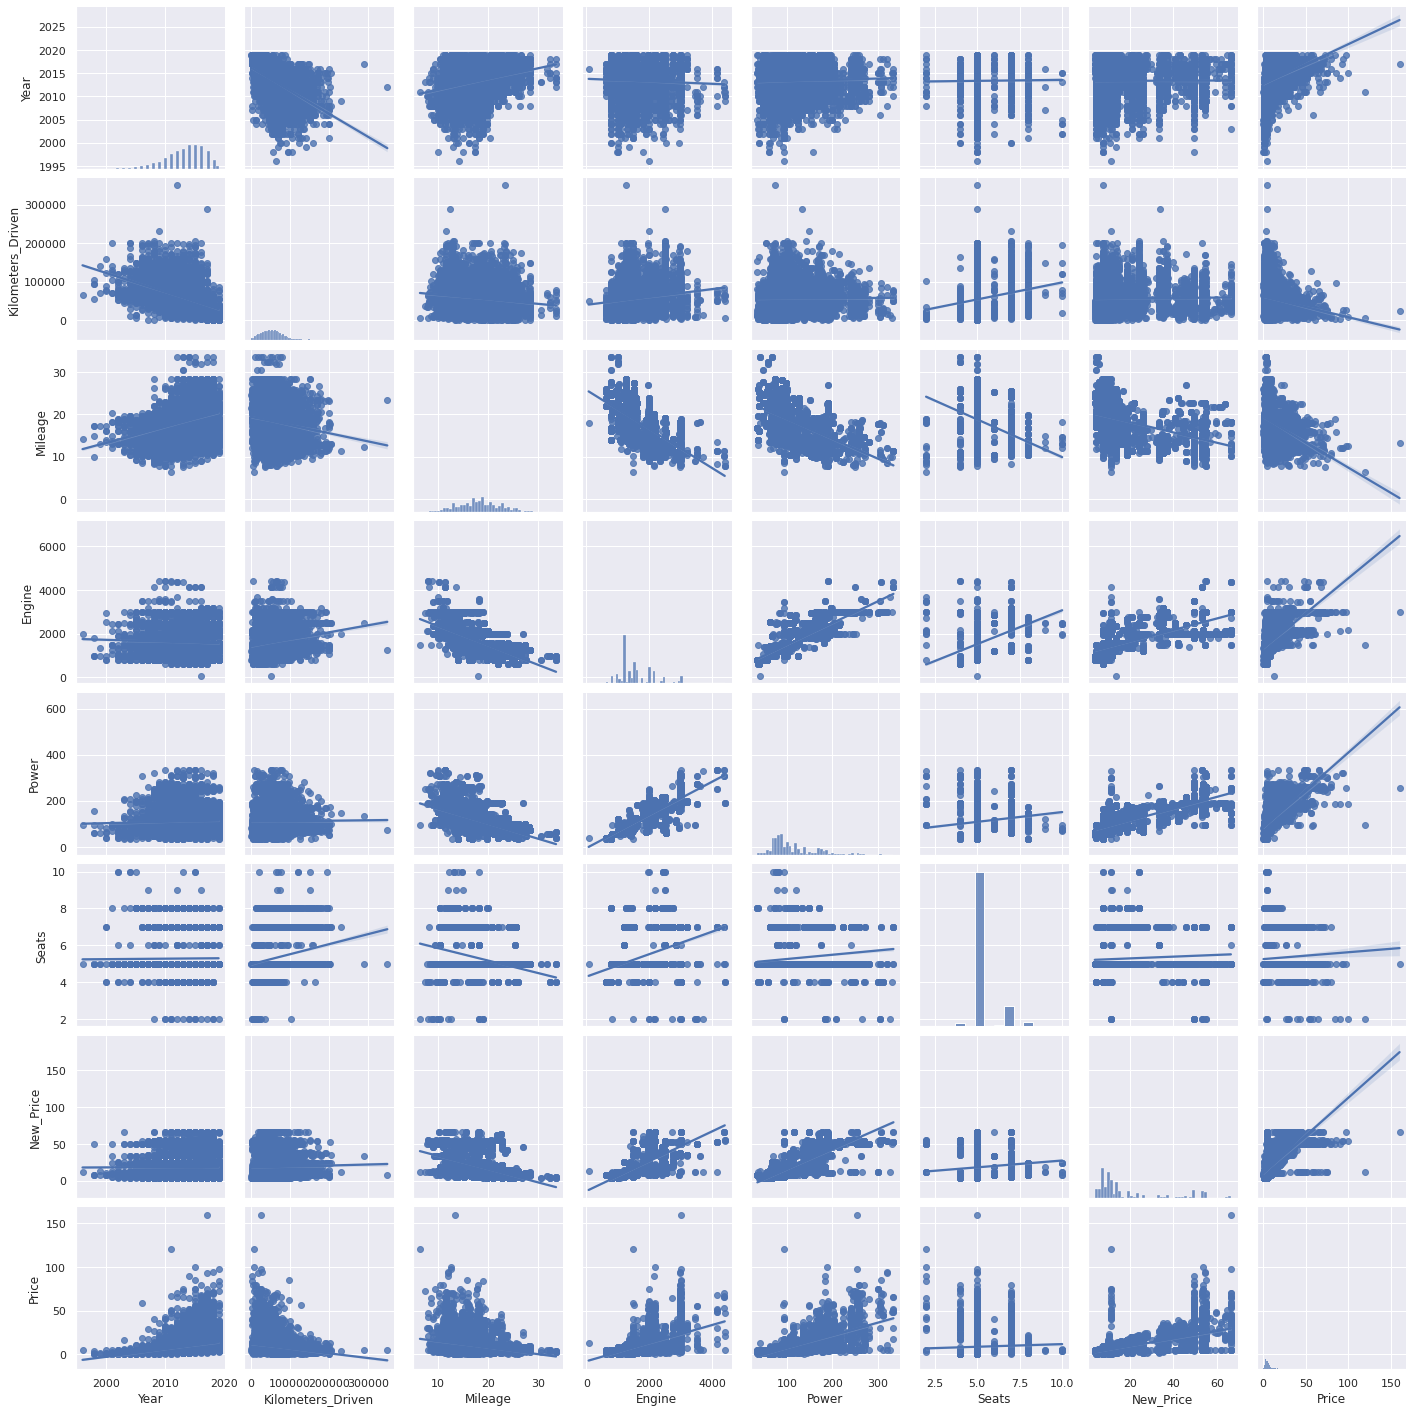

In [ ]:
#Pairplot of all the numeric features
sns.pairplot(data, kind = 'reg');

Create a heatmap to review correlations.

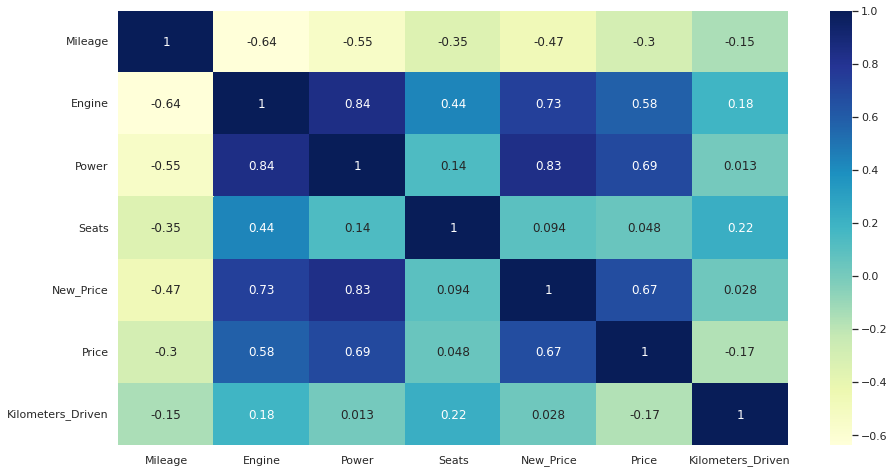

In [ ]:
#Heatmap/Visual representation of the correlation
plt.figure(figsize = (15,8))
sns.heatmap(data=data[['Mileage',	'Engine',	'Power',	'Seats',	'New_Price',	'Price', 'Kilometers_Driven']].corr(), 
            annot=True, cmap='YlGnBu');

We have addressed all the outliers and missing data. Let's now convert the price and new_price columns to log.

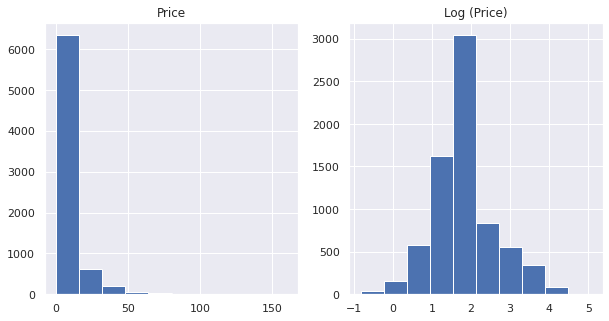

In [ ]:
#Plot the before log transformation of price column
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
plt.title('Price')
plt.hist(data['Price'])

#After log transformation of price column
plt.subplot(1, 2, 2)
plt.title('Log (Price)')
plt.hist(np.log(data['Price']))
plt.show()

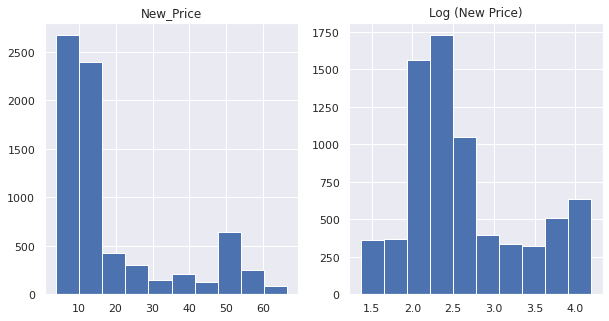

In [ ]:
#Plot the before log transformation of new_price column
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
plt.title('New_Price')
plt.hist(data['New_Price'])

#After log transformation of new_price column
plt.subplot(1, 2, 2)
plt.title('Log (New Price)')
plt.hist(np.log(data['New_Price']))
plt.show()

In [ ]:
#Create log transformation columns
data['Price_Log'] = np.log(data['Price'])
data['New_Price_Log'] = np.log(data['New_Price'])
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Years_bin,Price_Log,New_Price_Log
0,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75,Maruti,2008-2011,0.559616,1.706565
1,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50,Hyundai,2012-2015,2.525729,2.776332
2,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,2008-2011,1.504077,2.152924
3,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00,Maruti,2012-2015,1.791759,2.422144
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74,Audi,2012-2015,2.875822,3.972930


We can now drop the Years_bin column as this will not offer any value in our model.

In [ ]:
#Drop Years_bin column
data.drop(['Years_bin'], axis=1, inplace=True)

Lastly, we will perform OneHot Encoding on all the categorical columns in the dataset.

According to https://www.educative.io/blog/one-hot-encoding:

*One hot encoding makes our training data more useful and expressive, and it can be rescaled easily. By using numeric values, we more easily determine a probability for our values. In particular, one hot encoding is used for our output values, since it provides more nuanced predictions than single labels.*

We will use one hot encoding on the Transmission, Owner_Type, Fuel_Type, and Location columns.

In [ ]:
data = pd.get_dummies(data, columns=['Location', 'Fuel_Type','Transmission','Owner_Type','Make'], drop_first=True)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Price_Log,New_Price_Log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
0,2010,72000.0,26.60,998.0,58.16,5.0,5.51,1.75,0.559616,1.706565,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000.0,19.67,1582.0,126.20,5.0,16.06,12.50,2.525729,2.776332,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,46000.0,18.20,1199.0,88.70,5.0,8.61,4.50,1.504077,2.152924,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,87000.0,20.77,1248.0,88.76,7.0,11.27,6.00,1.791759,2.422144,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,40670.0,15.20,1968.0,140.80,5.0,53.14,17.74,2.875822,3.972930,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7247,2011,89411.0,20.54,1598.0,103.60,5.0,13.23,5.00,1.609438,2.582487,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7248,2015,59000.0,17.21,1197.0,103.60,5.0,10.15,5.00,1.609438,2.317474,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7249,2012,28000.0,23.08,1461.0,63.10,5.0,9.47,5.00,1.609438,2.248129,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7250,2013,52262.0,17.20,1197.0,103.60,5.0,10.15,5.00,1.609438,2.317474,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


***Model Building***

***Model One***

This model contains log of Price and New Price and OneHot Encoding. The dependent variable is Price.

In [ ]:
#Make copy of original dataset
data1 = data.copy()
data1.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Price_Log,New_Price_Log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
0,2010,72000.0,26.60,998.0,58.16,5.0,5.51,1.75,0.559616,1.706565,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000.0,19.67,1582.0,126.20,5.0,16.06,12.50,2.525729,2.776332,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,46000.0,18.20,1199.0,88.70,5.0,8.61,4.50,1.504077,2.152924,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,87000.0,20.77,1248.0,88.76,7.0,11.27,6.00,1.791759,2.422144,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,40670.0,15.20,1968.0,140.80,5.0,53.14,17.74,2.875822,3.972930,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Select Independent and Dependent Variables
a = data1.drop(['Price'], axis=1)
b = data1["Price"]

In [ ]:
#Splitting the data in 70:30 ratio for train to test data
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.30, random_state=1)

In [ ]:
#View split
print("Number of rows in train data =", a_train.shape[0])
print("Number of rows in test data =", a_test.shape[0])

Number of rows in train data = 5076
Number of rows in test data = 2176


In [ ]:
#Fit model_one
model_one = LinearRegression()
model_one.fit(a_train, b_train)

LinearRegression()

In [ ]:
#Checking model performance on train set
print("Training Performance")
print('\n')
training_perfomace_1 = model_performance_regression(model_one, a_train, b_train)
training_perfomace_1

Training Performance




,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.662374,2.71208,0.797091,0.794745,66.437161


In [ ]:
#Checking model performance on test set
print("Test Performance")
print("\n")
test_performance_1 = model_performance_regression(model_one, a_test, b_test)
test_performance_1

Test Performance




,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.566153,2.704064,0.802739,0.797334,71.478164


In [ ]:
#Coefficients and intercept of model_one
coef_data_1 = pd.DataFrame(np.append(model_one.coef_, model_one.intercept_), index=a_train.columns.tolist() + ["Intercept"], columns=["Coefficients"],)
coef_data_1

,Coefficients
Year,-0.362533
Kilometers_Driven,-0.000013
Mileage,-0.014157
Engine,0.000391
Power,0.032795
...,...
Make_Tata,-4.465909
Make_Toyota,-6.974267
Make_Volkswagen,-6.779367
Make_Volvo,-9.147869


In [ ]:
#Evalation of Feature Importance
imp_1 = pd.DataFrame(data={
    'Attribute': a_train.columns,
    'Importance': model_one.coef_
})
imp_1 = imp_1.sort_values(by='Importance', ascending=False)
imp_1

,Attribute,Importance
7,Price_Log,10.937580
50,Make_Porsche,8.078157
29,Make_Bentley,4.325350
26,Owner_Type_Third,1.852915
14,Location_Jaipur,1.290979
...,...,...
36,Make_Honda,-7.413409
47,Make_Mitsubishi,-7.499325
57,Make_Volvo,-9.147869
33,Make_Force,-10.649089


The following are the most important features positively impacting price for this model:

*   Price_Log
*   Make_Porsche
*   Make_Bentley
*   Owner_Type_Third
*   Location_Jaipur

In [ ]:
#Equation of linear regression
equation_one = "Price = " + str(model_one.intercept_)
print(equation_one, end=" ")

for i in range(len(a_train.columns)):
    if i != len(a_train.columns) - 1:
        print("+ (", model_one.coef_[i],")*(", a_train.columns[i],")",end="  ",)
    else:
        print("+ (", model_one.coef_[i], ")*(", a_train.columns[i], ")")

Price = 736.4497985737344 + ( -0.3625329082148889 )*( Year )  + ( -1.3110189822674006e-05 )*( Kilometers_Driven )  + ( -0.014157293529257167 )*( Mileage )  + ( 0.0003911564010086188 )*( Engine )  + ( 0.0327950392035401 )*( Power )  + ( -0.3552105386835278 )*( Seats )  + ( 0.3012600646220953 )*( New_Price )  + ( 10.937580127939356 )*( Price_Log )  + ( -7.378205154754799 )*( New_Price_Log )  + ( 0.3734729001231947 )*( Location_Bangalore )  + ( 0.7548562308270204 )*( Location_Chennai )  + ( 0.7999091213003968 )*( Location_Coimbatore )  + ( 0.27342183503313544 )*( Location_Delhi )  + ( 0.566644864147059 )*( Location_Hyderabad )  + ( 1.2909791398995183 )*( Location_Jaipur )  + ( 0.31157631469545244 )*( Location_Kochi )  + ( 0.9662064166581987 )*( Location_Kolkata )  + ( 0.0339777741750662 )*( Location_Mumbai )  + ( 1.0204222416751427 )*( Location_Pune )  + ( -0.3802091756062127 )*( Fuel_Type_Diesel )  + ( 0.18076487651952045 )*( Fuel_Type_Electric )  + ( -0.23908062444603218 )*( Fuel_Type_L

According to [How to Use Polynomial Feature Transforms for Machine Learning](https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/):

*These features are called interaction and polynomial features and allow the use of simpler modeling algorithms as some of the complexity of interpreting the input variables and their relationships is pushed back to the data preparation stage. Sometimes these features can result in improved modeling performance, although at the cost of adding thousands or even millions of additional input variables.*

In [ ]:
#PolynomialFeatures Transformation
poly = PolynomialFeatures(degree=2, interaction_only=True)
a_train2 = poly.fit_transform(a_train)
a_test2 = poly.fit_transform(a_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(a_train2, b_train)
print(poly_clf.score(a_train2, b_train))

0.976705228388809


The polynomial tranformation improved the model from .79 to .97.

In [ ]:
#Out of sample (testing) R^2
print(poly_clf.score(a_test2, b_test))

-1.5973006504258143


In [ ]:
#Shape before PolynomialFeature Transformation
print(a_train.shape)
#Shape after Polynomial Transformation
print(a_train2.shape)

(5076, 58)
(5076, 1712)


As you can see, this increased the amount of rows tremedously. We can expect to see this throughout the other models.

***Model Two***

This model contains log of Price and New Price and OneHot Encoding. The dependent variable is Price_Log.

In [ ]:
#Select Independent and Dependent Variables
c = data1.drop(["Price_Log"], axis=1)
d = data1["Price_Log"]

In [ ]:
#Splitting the data in 70:30 ratio for train to test data
c_train, c_test, d_train, d_test = train_test_split(c, d, test_size=0.30, random_state=1)

In [ ]:
#Fit model_two
model_two = LinearRegression()
model_two.fit(c_train, d_train)

LinearRegression()

In [ ]:
#Checking model performance on train set
print("Training Performance")
print("\n")
training_performance_2 = model_performance_regression(model_two, c_train, d_train)
training_performance_2

Training Performance




,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.281181,0.205009,0.874681,0.873232,inf


In [ ]:
#Checking model performance on test set
print("Test Performance")
print("\n")
test_performance_2= model_performance_regression(model_two, c_test, d_test)
test_performance_2

Test Performance




,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.27787,0.203732,0.883551,0.880361,inf


In [ ]:
#Coefficients and intercept of model_two
coef_data_2 = pd.DataFrame(np.append(model_two.coef_, model_two.intercept_), index=c_train.columns.tolist() + ["Intercept"], columns=["Coefficients"],)
coef_data_2

,Coefficients
Year,7.038313e-02
Kilometers_Driven,-2.293956e-07
Mileage,-1.468010e-03
Engine,6.868859e-05
Power,9.529236e-04
...,...
Make_Tata,2.127227e-02
Make_Toyota,2.958248e-01
Make_Volkswagen,2.581272e-01
Make_Volvo,2.646655e-01


In [ ]:
#Evalation of Feature Importance
imp_2 = pd.DataFrame(data={
    'Attribute': c_train.columns,
    'Importance': model_two.coef_
})
imp_2 = imp_2.sort_values(by='Importance', ascending=False)
imp_2

,Attribute,Importance
35,Make_Hindustan,1.489286
29,Make_Bentley,0.819784
33,Make_Force,0.583271
20,Fuel_Type_Electric,0.512405
8,New_Price_Log,0.428403
...,...,...
14,Location_Jaipur,-0.071356
23,Transmission_Manual,-0.084382
38,Make_Isuzu,-0.139180
16,Location_Kolkata,-0.143733


The following are the most important features positively impacting price for this model:

*   Make_Hindustan
*   Make_Bentley	
*   Make_Force
*   Fuel_Type_Electric
*   New_Price_Log

In [ ]:
#Equation of linear regression
equation_two = "Price = " + str(model_two.intercept_)
print(equation_two, end=" ")

for i in range(len(c_train.columns)):
    if i != len(c_train.columns) - 1:
        print("+ (", model_two.coef_[i],")*(", c_train.columns[i],")",end="  ",)
    else:
        print("+ (", model_two.coef_[i], ")*(", c_train.columns[i], ")")

Price = -141.7226594097843 + ( 0.07038313446860386 )*( Year )  + ( -2.2939557346396125e-07 )*( Kilometers_Driven )  + ( -0.0014680099740207635 )*( Mileage )  + ( 6.868859358589302e-05 )*( Engine )  + ( 0.0009529235858715289 )*( Power )  + ( 0.022657677147715265 )*( Seats )  + ( -0.008448040033183331 )*( New_Price )  + ( 0.039781419291305506 )*( Price )  + ( 0.4284025077918667 )*( New_Price_Log )  + ( 0.026243694855932503 )*( Location_Bangalore )  + ( -0.0055874694173044005 )*( Location_Chennai )  + ( 0.007492588792475746 )*( Location_Coimbatore )  + ( -0.05064561587261268 )*( Location_Delhi )  + ( 0.03031065991009263 )*( Location_Hyderabad )  + ( -0.07135575904068536 )*( Location_Jaipur )  + ( -0.041882930039404326 )*( Location_Kochi )  + ( -0.1437325190482121 )*( Location_Kolkata )  + ( -0.016399467177019733 )*( Location_Mumbai )  + ( -0.05705294231925745 )*( Location_Pune )  + ( 0.08103820201185702 )*( Fuel_Type_Diesel )  + ( 0.5124052662720804 )*( Fuel_Type_Electric )  + ( 0.0814747

In [ ]:
#PolynomialFeatures Transformation
c_train2 = poly.fit_transform(c_train)
c_test2 = poly.fit_transform(c_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(c_train2, d_train)
print(poly_clf.score(c_train2, d_train))

0.9864058091320974


This improved the model from .88 to .98

In [ ]:
#Out of sample (testing) R^2
print(poly_clf.score(c_test2, d_test))

-9.340886158137025


In [ ]:
#Shape before PolynomialFeature Transformation
print(d_train.shape)
#Shape after Polynomial Transformation
print(c_train2.shape)

(5076,)
(5076, 1712)


***Model Three***

This model contains log of Price and New Price and OneHot Encoding. We will now create the log values for Kilometers_Driven. The dependent variable is Price.

In [ ]:
#Make copy of original dataset
data3 = data1.copy()
data3.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Price_Log,New_Price_Log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
0,2010,72000.0,26.60,998.0,58.16,5.0,5.51,1.75,0.559616,1.706565,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000.0,19.67,1582.0,126.20,5.0,16.06,12.50,2.525729,2.776332,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,46000.0,18.20,1199.0,88.70,5.0,8.61,4.50,1.504077,2.152924,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,87000.0,20.77,1248.0,88.76,7.0,11.27,6.00,1.791759,2.422144,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,40670.0,15.20,1968.0,140.80,5.0,53.14,17.74,2.875822,3.972930,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


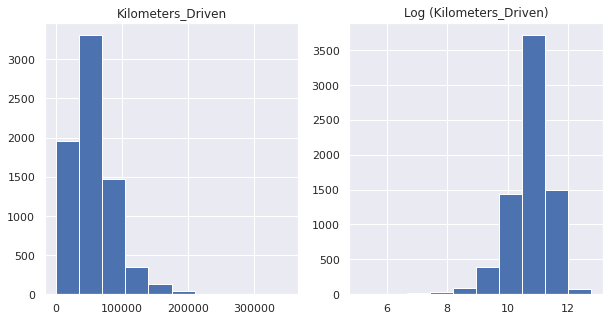

In [ ]:
#Plot the before log transformation of power column
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
plt.title('Kilometers_Driven')
plt.hist(data3['Kilometers_Driven'])

#After log transformation of power column
plt.subplot(1, 2, 2)
plt.title('Log (Kilometers_Driven)')
plt.hist(np.log(data3['Kilometers_Driven']))
plt.show()

In [ ]:
#Commit the log transformation of Kilmeters_Driven to the datafram
data3['Kilometers_Driven_Log'] = np.log(data['Kilometers_Driven'])
data3.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Price_Log,New_Price_Log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Kilometers_Driven_Log
0,2010,72000.0,26.60,998.0,58.16,5.0,5.51,1.75,0.559616,1.706565,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11.184421
1,2015,41000.0,19.67,1582.0,126.20,5.0,16.06,12.50,2.525729,2.776332,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.621327
2,2011,46000.0,18.20,1199.0,88.70,5.0,8.61,4.50,1.504077,2.152924,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.736397
3,2012,87000.0,20.77,1248.0,88.76,7.0,11.27,6.00,1.791759,2.422144,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11.373663
4,2013,40670.0,15.20,1968.0,140.80,5.0,53.14,17.74,2.875822,3.972930,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.613246


In [ ]:
#Select Independent and Dependent Variables
e = data3.drop(["Price"], axis=1)
f = data3["Price"]

In [ ]:
#Splitting the data in 70:30 ratio for train to test data
e_train, e_test, f_train, f_test = train_test_split(e, f, test_size=0.30, random_state=1)

In [ ]:
#Fit model_three
model_three = LinearRegression()
model_three.fit(e_train, f_train)

LinearRegression()

In [ ]:
#Checking model performance on train set
print("Training Performance")
print("\n")
training_performance_3 = model_performance_regression(model_three, e_train, f_train)
training_performance_3

Training Performance




,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.650846,2.714905,0.798093,0.795718,66.290707


In [ ]:
#Checking model performance on test set
print("Training Performance")
print("\n")
test_performance_3 = model_performance_regression(model_three, e_test, f_test)
test_performance_3

Training Performance




,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.552131,2.71493,0.803948,0.798482,71.456292


In [ ]:
#Coefficients and intercept of model_three
coef_data_3 = pd.DataFrame(np.append(model_three.coef_, model_three.intercept_), index=e_train.columns.tolist() + ["Intercept"], columns=["Coefficients"],)
coef_data_3

,Coefficients
Year,-0.393759
Kilometers_Driven,0.000005
Mileage,-0.012654
Engine,0.000300
Power,0.034014
...,...
Make_Toyota,-6.931831
Make_Volkswagen,-6.633553
Make_Volvo,-9.059370
Kilometers_Driven_Log,-1.045581


In [ ]:
#Evalation of Feature Importance
imp_3 = pd.DataFrame(data={
    'Attribute': e_train.columns,
    'Importance': model_three.coef_
})
imp_3 = imp_3.sort_values(by='Importance', ascending=False)
print(imp_3)
print("\n")
print("Slope:" , model_three.intercept_)

              Attribute  Importance
7             Price_Log   10.908399
50         Make_Porsche    8.172146
29         Make_Bentley    4.413704
26     Owner_Type_Third    1.773308
23  Transmission_Manual    1.287686
..                  ...         ...
47      Make_Mitsubishi   -7.460537
40            Make_Jeep   -7.644643
57           Make_Volvo   -9.059370
33           Make_Force  -10.380294
35       Make_Hindustan  -14.260153

[59 rows x 2 columns]


Slope: 809.3614297526602


The following are the most important features positively impacting price for this model:

*   Price_Log 
*   Make_Porsche 	
*   Make_Bentley
*   Owner_Type_Third
*   Transmission_Manual

In [ ]:
#Equation of linear regression
equation_three = "Price = " + str(model_three.intercept_)
print(equation_three, end=" ")

for i in range(len(e_train.columns)):
    if i != len(e_train.columns) - 1:
        print("+ (", model_three.coef_[i],")*(", e_train.columns[i],")",end="  ",)
    else:
        print("+ (", model_three.coef_[i], ")*(", e_train.columns[i], ")")

Price = 809.3614297526602 + ( -0.39375918344635746 )*( Year )  + ( 5.018900818443356e-06 )*( Kilometers_Driven )  + ( -0.012654445443251575 )*( Mileage )  + ( 0.00029965342804150197 )*( Engine )  + ( 0.03401367629016516 )*( Power )  + ( -0.3440758326244753 )*( Seats )  + ( 0.2925673927240986 )*( New_Price )  + ( 10.908398700668867 )*( Price_Log )  + ( -7.219026031191871 )*( New_Price_Log )  + ( 0.35042906028488563 )*( Location_Bangalore )  + ( 0.64497730340464 )*( Location_Chennai )  + ( 0.8557975004304614 )*( Location_Coimbatore )  + ( 0.2767803718994273 )*( Location_Delhi )  + ( 0.4796584104189856 )*( Location_Hyderabad )  + ( 1.2111416204438976 )*( Location_Jaipur )  + ( 0.3452392435194711 )*( Location_Kochi )  + ( 0.8434103487728154 )*( Location_Kolkata )  + ( -0.11182559694569316 )*( Location_Mumbai )  + ( 0.9239012842966489 )*( Location_Pune )  + ( -0.461160410612233 )*( Fuel_Type_Diesel )  + ( 0.3200363200359204 )*( Fuel_Type_Electric )  + ( -0.22627008710740437 )*( Fuel_Type_LP

In [ ]:
#Polynomial Feature Transformation
e_train2 = poly.fit_transform(e_train)
e_test2 = poly.fit_transform(e_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(e_train2, f_train)
print(poly_clf.score(e_train2, f_train))

0.9796864560728231


This improved the score from .79 to .97.

In [ ]:
#Out of sample (testing) R^2
print(poly_clf.score(e_test2, f_test))

-16.1159761635232


In [ ]:
#Shape before PolynomialFeature Transformation
print(e_train.shape)
#Shape after Polynomial Transformation
print(e_train2.shape)

(5076, 59)
(5076, 1771)


***Model Four***

This model contains log of Price, New Price, and Kilometers_Driven - with OneHot Encoding. We will now create the log values for . The dependent variable is Price_Log.

In [ ]:
#Select Independent and Dependent Variables
g = data3.drop(["Price_Log"], axis=1)
h = data3["Price_Log"]

In [ ]:
#Splitting the data in 70:30 ratio for train to test data
g_train, g_test, h_train, h_test = train_test_split(g, h, test_size=0.30, random_state=1)

In [ ]:
#Fit model_four
model_four = LinearRegression()
model_four.fit(g_train, h_train)

LinearRegression()

In [ ]:
#Checking model performance on train set
print("Training Performance")
print("\n")
training_performance_4 = model_performance_regression(model_four, g_train, h_train)
training_performance_4

Training Performance




,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.281117,0.204985,0.874738,0.873265,inf


In [ ]:
#Checking model performance on test set
print("Test Performance")
print("\n")
test_performance_4 = model_performance_regression(model_four, g_test, h_test)
test_performance_4

Test Performance




,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.277742,0.203701,0.883658,0.880415,inf


In [ ]:
#Coefficients and intercept of model_four
coef_data_4 = pd.DataFrame(np.append(model_four.coef_, model_four.intercept_), index=g_train.columns.tolist() + ["Intercept"], columns=["Coefficients"],)
coef_data_4

,Coefficients
Year,7.095769e-02
Kilometers_Driven,-5.612212e-07
Mileage,-1.493670e-03
Engine,7.030310e-05
Power,9.271199e-04
...,...
Make_Toyota,2.955430e-01
Make_Volkswagen,2.559453e-01
Make_Volvo,2.637487e-01
Kilometers_Driven_Log,1.921244e-02


In [ ]:
#Evaluation of Feature Importance
imp_4 = pd.DataFrame(data={
    'Attribute': g_train.columns,
    'Importance': model_four.coef_
})
imp_4 = imp_4.sort_values(by='Importance', ascending=False)
print(imp_4)
print("\n")
print("Slope:" , model_four.intercept_)

              Attribute  Importance
35       Make_Hindustan    1.494251
29         Make_Bentley    0.817394
33           Make_Force    0.579032
20   Fuel_Type_Electric    0.509596
8         New_Price_Log    0.425952
..                  ...         ...
14      Location_Jaipur   -0.069973
23  Transmission_Manual   -0.084427
38           Make_Isuzu   -0.127718
16     Location_Kolkata   -0.141498
26     Owner_Type_Third   -0.153643

[59 rows x 2 columns]


Slope: -143.06455157304717


The following are the most important features positively impacting price for this model:

*   Make_Hindustan 
*   Make_Bentley 	
*   Make_Force
*   Fuel_Type_Electric
*   New_Price_Log

In [ ]:
#Equation of linear regression
equation_four = "Price = " + str(model_four.intercept_)
print(equation_four, end=" ")

for i in range(len(g_train.columns)):
    if i != len(a_train.columns) - 1:
        print("+ (", model_four.coef_[i],")*(", g_train.columns[i],")",end="  ",)
    else:
        print("+ (", model_four.coef_[i], ")*(", g_train.columns[i], ")")

Price = -143.06455157304717 + ( 0.0709576899788568 )*( Year )  + ( -5.612211885221797e-07 )*( Kilometers_Driven )  + ( -0.0014936697234704767 )*( Mileage )  + ( 7.030309871680629e-05 )*( Engine )  + ( 0.0009271199497244576 )*( Power )  + ( 0.022474973584146955 )*( Seats )  + ( -0.008311798195696631 )*( New_Price )  + ( 0.03985401728327363 )*( Price )  + ( 0.4259516822170534 )*( New_Price_Log )  + ( 0.026621249249288964 )*( Location_Bangalore )  + ( -0.003634412994119124 )*( Location_Chennai )  + ( 0.006389629081391485 )*( Location_Coimbatore )  + ( -0.0507090263685733 )*( Location_Delhi )  + ( 0.03184376528487698 )*( Location_Hyderabad )  + ( -0.06997334705388736 )*( Location_Jaipur )  + ( -0.04251064300119706 )*( Location_Kochi )  + ( -0.14149823705316206 )*( Location_Kolkata )  + ( -0.013715943656763041 )*( Location_Mumbai )  + ( -0.05534594771550416 )*( Location_Pune )  + ( 0.08252318924375318 )*( Fuel_Type_Diesel )  + ( 0.5095958771992416 )*( Fuel_Type_Electric )  + ( 0.08122387970

In [ ]:
#PolynomialFeature Transformation
g_train2 = poly.fit_transform(g_train)
g_test2 = poly.fit_transform(g_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(g_train2, h_train)
print(poly_clf.score(g_train2, h_train))

0.9870557724407728


This improved the score from .88 to .98.

In [ ]:
#Out of sample (testing) R^2
print(poly_clf.score(g_test2, h_test))

-8.212211542406003


In [ ]:
#Shape before PolynomialFeature Transformation
print(g_train.shape)
#Shape after Polynomial Transformation
print(g_train2.shape)

(5076, 59)
(5076, 1771)


***Model Five***

This model contains log of Price, New Price, and Kilometers_Driven - all with OneHot Encoding. We will now create the log values for Mileage. The dependent variable is Price.

In [ ]:
#Make copy of original dataset
data5 = data3.copy()
data5.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Price_Log,New_Price_Log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Kilometers_Driven_Log
0,2010,72000.0,26.60,998.0,58.16,5.0,5.51,1.75,0.559616,1.706565,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11.184421
1,2015,41000.0,19.67,1582.0,126.20,5.0,16.06,12.50,2.525729,2.776332,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.621327
2,2011,46000.0,18.20,1199.0,88.70,5.0,8.61,4.50,1.504077,2.152924,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.736397
3,2012,87000.0,20.77,1248.0,88.76,7.0,11.27,6.00,1.791759,2.422144,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11.373663
4,2013,40670.0,15.20,1968.0,140.80,5.0,53.14,17.74,2.875822,3.972930,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.613246


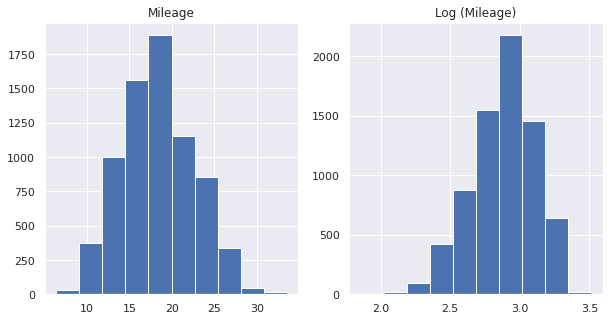

In [ ]:
#Plot the before log transformation of mileage column
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
plt.title('Mileage')
plt.hist(data5['Mileage'])

#After log transformation of mileage column
plt.subplot(1, 2, 2)
plt.title('Log (Mileage)')
plt.hist(np.log(data5['Mileage']))
plt.show()

In [ ]:
#Commit log transformation of Mileage to datafram
data5['Mileage_Log'] = np.log(data['Mileage'])
data5.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Price_Log,New_Price_Log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Kilometers_Driven_Log,Mileage_Log
0,2010,72000.0,26.60,998.0,58.16,5.0,5.51,1.75,0.559616,1.706565,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11.184421,3.280911
1,2015,41000.0,19.67,1582.0,126.20,5.0,16.06,12.50,2.525729,2.776332,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.621327,2.979095
2,2011,46000.0,18.20,1199.0,88.70,5.0,8.61,4.50,1.504077,2.152924,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.736397,2.901422
3,2012,87000.0,20.77,1248.0,88.76,7.0,11.27,6.00,1.791759,2.422144,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11.373663,3.033510
4,2013,40670.0,15.20,1968.0,140.80,5.0,53.14,17.74,2.875822,3.972930,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.613246,2.721295


In [ ]:
#Select Independent and Dependent Variables
i = data5.drop(["Price"], axis=1)
j = data5["Price"]

In [ ]:
#Splitting the data in 70:30 ratio for train to test data
i_train, i_test, j_train, j_test = train_test_split(i, j, test_size=0.30, random_state=1)

In [ ]:
#Fit model_five
model_five = LinearRegression()
model_five.fit(i_train, j_train)

LinearRegression()

In [ ]:
#Checking model performance on train set
print("Training Performance")
print("\n")
training_performance_5 = model_performance_regression(model_five, i_train, j_train)
training_performance_5

Training Performance




/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.646152,2.713466,0.798501,0.79609,66.224742


In [ ]:
# Checking model performance on test set
print("Test Performance")
print("\n")
test_performance_5 = model_performance_regression(model_five, i_test, j_test)
test_performance_5

Test Performance




,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.558877,2.715196,0.803367,0.797789,71.503084


In [ ]:
#Coefficients and intercept of model_five
coef_data_5 = pd.DataFrame(np.append(model_five.coef_, model_five.intercept_), index=i_train.columns.tolist() + ["Intercept"], columns=["Coefficients"],)
coef_data_5

,Coefficients
Year,-0.395895
Kilometers_Driven,0.000005
Mileage,-0.405748
Engine,0.000643
Power,0.033495
...,...
Make_Volkswagen,-6.971932
Make_Volvo,-9.247350
Kilometers_Driven_Log,-1.068215
Mileage_Log,7.425435


In [ ]:
#Evaluation of Feature Importance
imp_5 = pd.DataFrame(data={
    'Attribute': i_train.columns,
    'Importance': model_five.coef_
})
imp_5 = imp_5.sort_values(by='Importance', ascending=False)
print(imp_5)
print("\n")
print("Slope:" , model_five.intercept_)

           Attribute  Importance
7          Price_Log   10.892796
50      Make_Porsche    7.818170
59       Mileage_Log    7.425435
29      Make_Bentley    5.442026
26  Owner_Type_Third    1.791085
..               ...         ...
28          Make_BMW   -7.733752
40         Make_Jeep   -8.114638
57        Make_Volvo   -9.247350
33        Make_Force  -10.961606
35    Make_Hindustan  -14.590006

[60 rows x 2 columns]


Slope: 800.2522403389205


The following are the most important features positively impacting price for this model:

*   Price_Log
*   Make_Porsche 	
*   Mileage_Log
*   Make_Bentley
*   Owner_Type_Third

In [ ]:
#Equation of linear regression
equation_five = "Price = " + str(model_five.intercept_)
print(equation_five, end=" ")

for i in range(len(i_train.columns)):
    if i != len(i_train.columns) - 1:
        print("+ (", model_five.coef_[i],")*(", i_train.columns[i],")",end="  ",)
    else:
        print("+ (", model_five.coef_[i], ")*(", i_train.columns[i], ")")

Price = 800.2522403389205 + ( -0.3958947482208755 )*( Year )  + ( 5.430877398615412e-06 )*( Kilometers_Driven )  + ( -0.405747955459224 )*( Mileage )  + ( 0.0006433684932378725 )*( Engine )  + ( 0.033495070665703675 )*( Power )  + ( -0.346113007679131 )*( Seats )  + ( 0.30156723396736673 )*( New_Price )  + ( 10.892796127522384 )*( Price_Log )  + ( -7.351968212592223 )*( New_Price_Log )  + ( 0.33345851013663785 )*( Location_Bangalore )  + ( 0.6114162500927116 )*( Location_Chennai )  + ( 0.8187983085591615 )*( Location_Coimbatore )  + ( 0.280967829697333 )*( Location_Delhi )  + ( 0.46622572799723905 )*( Location_Hyderabad )  + ( 1.2019813043113277 )*( Location_Jaipur )  + ( 0.3393389841496304 )*( Location_Kochi )  + ( 0.8340485714847898 )*( Location_Kolkata )  + ( -0.1269681609097597 )*( Location_Mumbai )  + ( 0.9053907245308574 )*( Location_Pune )  + ( -0.9566675031321061 )*( Fuel_Type_Diesel )  + ( -0.4529348954808792 )*( Fuel_Type_Electric )  + ( -0.524562839213119 )*( Fuel_Type_LPG )

In [ ]:
#PolynomialFeature Transformation
i_train2 = poly.fit_transform(i_train)
i_test2 = poly.fit_transform(i_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(i_train2, j_train)
print(poly_clf.score(i_train2, j_train))

0.9808536533399395


This improved the score from .79 to .98

In [ ]:
#Out of sample (testing) R^2
print(poly_clf.score(i_test2, j_test))

-12.422628456043636


In [ ]:
#Shape before PolynomialFeature Transformation
print(i_train.shape)
#Shape after Polynomial Transformation
print(i_train2.shape)

(5076, 60)
(5076, 1831)


***Model Six***

This model contains log of Price, New Price, Kilometers_Driven, and Mileage - all with OneHot Encoding. The dependent variable is Price_Log.

In [ ]:
#Select Independent and Dependent Variables
k = data5.drop(["Price_Log"], axis=1)
l = data5["Price_Log"]

In [ ]:
#Splitting the data in 70:30 ratio for train to test data
k_train, k_test, l_train, l_test = train_test_split(k, l, test_size=0.30, random_state=1)

In [ ]:
#Fit model_six
model_six = LinearRegression()
model_six.fit(k_train, l_train)

LinearRegression()

In [ ]:
# Checking model performance on train set
print("Training Performance")
print("\n")
training_performance_6 = model_performance_regression(model_six, k_train, l_train)
training_performance_6

Training Performance




,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.281107,0.204995,0.874747,0.873249,inf


In [ ]:
# Checking model performance on test set
print("Test Performance")
print("\n")
test_performance_6 = model_performance_regression(model_six, k_test, l_test)
test_performance_6

Test Performance




,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.277664,0.203742,0.883723,0.880425,inf


In [ ]:
#Coefficients and intercept of model_six
coef_data_6 = pd.DataFrame(np.append(model_six.coef_, model_six.intercept_), index=k_train.columns.tolist() + ["Intercept"], columns=["Coefficients"],)
coef_data_6

,Coefficients
Year,7.098646e-02
Kilometers_Driven,-5.660859e-07
Mileage,3.076012e-03
Engine,6.629553e-05
Power,9.322814e-04
...,...
Make_Volkswagen,2.600151e-01
Make_Volvo,2.661266e-01
Kilometers_Driven_Log,1.949863e-02
Mileage_Log,-8.631240e-02


In [ ]:
#Evaluation of Feature Importance
imp_6 = pd.DataFrame(data={
    'Attribute': k_train.columns,
    'Importance': model_six.coef_
})
imp_6 = imp_6.sort_values(by='Importance', ascending=False)
print(imp_6)
print("\n")
print("Slope:" , model_six.intercept_)

              Attribute  Importance
35       Make_Hindustan    1.498309
29         Make_Bentley    0.805277
33           Make_Force    0.585990
20   Fuel_Type_Electric    0.518535
8         New_Price_Log    0.427635
..                  ...         ...
23  Transmission_Manual   -0.084028
59          Mileage_Log   -0.086312
38           Make_Isuzu   -0.124475
16     Location_Kolkata   -0.141399
26     Owner_Type_Third   -0.153880

[60 rows x 2 columns]


Slope: -142.96699503427496


The following are the most important features positively impacting price for this model:

*   Make_Hindustan
*   Make_Bentley 	
*   Make_Force
*   Fuel_Type_Electric
*   New_Price_Log 

In [ ]:
#Equation of linear regression
equation_six = "Price = " + str(model_six.intercept_)
print(equation_six, end=" ")

for i in range(len(k_train.columns)):
    if i != len(k_train.columns) - 1:
        print("+ (", model_six.coef_[i],")*(", k_train.columns[i],")",end="  ",)
    else:
        print("+ (", model_six.coef_[i], ")*(", k_train.columns[i], ")")

Price = -142.96699503427496 + ( 0.0709864640008212 )*( Year )  + ( -5.660858697671339e-07 )*( Kilometers_Driven )  + ( 0.0030760119892691232 )*( Mileage )  + ( 6.629553098742857e-05 )*( Engine )  + ( 0.0009322813946036372 )*( Power )  + ( 0.022505049321100146 )*( Seats )  + ( -0.00842265389850657 )*( New_Price )  + ( 0.03987450226645717 )*( Price )  + ( 0.427634573090071 )*( New_Price_Log )  + ( 0.026808311814790625 )*( Location_Bangalore )  + ( -0.003259159167807571 )*( Location_Chennai )  + ( 0.006799156566130837 )*( Location_Coimbatore )  + ( -0.0507604158242865 )*( Location_Delhi )  + ( 0.03198628433742079 )*( Location_Hyderabad )  + ( -0.06989006242628898 )*( Location_Jaipur )  + ( -0.042446990110804106 )*( Location_Kochi )  + ( -0.14139865965440693 )*( Location_Kolkata )  + ( -0.013536284140009902 )*( Location_Mumbai )  + ( -0.05514832962619132 )*( Location_Pune )  + ( 0.08828757654400288 )*( Fuel_Type_Diesel )  + ( 0.518535349113479 )*( Fuel_Type_Electric )  + ( 0.08469045809849

In [ ]:
#PolynomialFeatures Transform
k_train2 = poly.fit_transform(k_train)
k_test2 = poly.fit_transform(k_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(k_train2, l_train)
print(poly_clf.score(k_train2, l_train))

0.9874291216465797


This improved the model from .88 to .98

In [ ]:
#Out of sample (testing) R^2
print(poly_clf.score(k_test2, l_test))

-22.1672208319973


In [ ]:
#Shape before PolynomialFeature Transformation
print(k_train.shape)
#Shape after Polynomial Transformation
print(k_train2.shape)

(5076, 60)
(5076, 1831)


***Model Seven***

This model contains log of Price, New Price, Kilometers_Driven, and Mileage - all with OneHot Encoding. We will now create the log values for Engine. The dependent variable is Price.

In [ ]:
#Make copy of data5
data6 = data5.copy()
data6.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Price_Log,New_Price_Log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Kilometers_Driven_Log,Mileage_Log
0,2010,72000.0,26.60,998.0,58.16,5.0,5.51,1.75,0.559616,1.706565,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11.184421,3.280911
1,2015,41000.0,19.67,1582.0,126.20,5.0,16.06,12.50,2.525729,2.776332,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.621327,2.979095
2,2011,46000.0,18.20,1199.0,88.70,5.0,8.61,4.50,1.504077,2.152924,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.736397,2.901422
3,2012,87000.0,20.77,1248.0,88.76,7.0,11.27,6.00,1.791759,2.422144,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11.373663,3.033510
4,2013,40670.0,15.20,1968.0,140.80,5.0,53.14,17.74,2.875822,3.972930,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.613246,2.721295


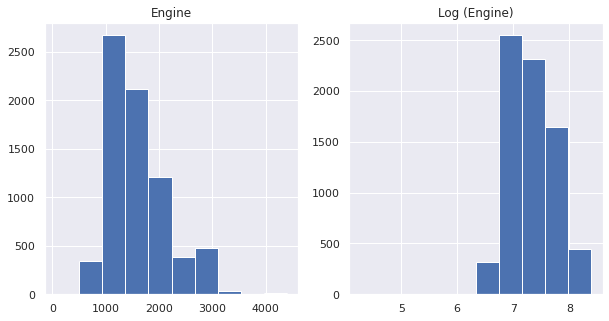

In [ ]:
#Plot the before log transformation of engine column
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
plt.title('Engine')
plt.hist(data6['Engine'])

#After log transformation of engine column
plt.subplot(1, 2, 2)
plt.title('Log (Engine)')
plt.hist(np.log(data6['Engine']))
plt.show()

In [ ]:
#Commit log transformations of Engine to dataframe
data6['Engine_Log'] = np.log(data['Engine'])
data6.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Price_Log,New_Price_Log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Kilometers_Driven_Log,Mileage_Log,Engine_Log
0,2010,72000.0,26.60,998.0,58.16,5.0,5.51,1.75,0.559616,1.706565,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11.184421,3.280911,6.905753
1,2015,41000.0,19.67,1582.0,126.20,5.0,16.06,12.50,2.525729,2.776332,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.621327,2.979095,7.366445
2,2011,46000.0,18.20,1199.0,88.70,5.0,8.61,4.50,1.504077,2.152924,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.736397,2.901422,7.089243
3,2012,87000.0,20.77,1248.0,88.76,7.0,11.27,6.00,1.791759,2.422144,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11.373663,3.033510,7.129298
4,2013,40670.0,15.20,1968.0,140.80,5.0,53.14,17.74,2.875822,3.972930,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.613246,2.721295,7.584773


In [ ]:
#Select Independent and Dependent Variable
m = data6.drop(["Price"], axis=1)
n = data6["Price"]

In [ ]:
#Splitting the data in 70:30 ratio for train to test data
m_train, m_test, n_train, n_test = train_test_split(m, n, test_size=0.30, random_state=1)

In [ ]:
#Fit model_seven
model_seven = LinearRegression()
model_seven.fit(m_train, n_train)

LinearRegression()

In [ ]:
# Checking model performance on train set
print("Training Performance")
print("\n")
training_performance_7 = model_performance_regression(model_seven, m_train, n_train)
training_performance_7 

Training Performance




,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.533931,2.620611,0.808117,0.805783,62.755939


In [ ]:
# Checking model performance on test set
print("Test Performance")
print("\n")
test_performance_7 = model_performance_regression(model_seven, m_test, n_test)
test_performance_7

Test Performance




,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.565489,2.655734,0.802796,0.797106,68.137732


In [ ]:
#Coefficients and intercept of model_seven
coef_data_7 = pd.DataFrame(np.append(model_seven.coef_, model_seven.intercept_), index=m_train.columns.tolist() + ["Intercept"], columns=["Coefficients"],)
coef_data_7

,Coefficients
Year,-0.386108
Kilometers_Driven,0.000007
Mileage,-0.844320
Engine,0.010869
Power,0.039304
...,...
Make_Volvo,-7.829082
Kilometers_Driven_Log,-1.032986
Mileage_Log,13.774708
Engine_Log,-20.808944


In [ ]:
#Evaluation of Feature Importance
imp_7 = pd.DataFrame(data={
    'Attribute': m_train.columns,
    'Importance': model_seven.coef_
})
imp_7 = imp_7.sort_values(by='Importance', ascending=False)
print(imp_7)
print("\n")
print("Slope:" , model_seven.intercept_)

         Attribute  Importance
59     Mileage_Log   13.774708
7        Price_Log   11.011661
29    Make_Bentley    6.644806
50    Make_Porsche    5.383420
42       Make_Land    3.865400
..             ...         ...
40       Make_Jeep   -8.345297
33      Make_Force  -10.265481
53      Make_Smart  -12.152076
35  Make_Hindustan  -13.950943
60      Engine_Log  -20.808944

[61 rows x 2 columns]


Slope: 900.2752603762407


The following are the most important features positively impacting price for this model:

*   Mileage_Log 
*   Price_Log
*   Make_Bentley
*   Make_Porsche
*   Make_Land

In [ ]:
#Equation of linear regression
equation_seven = "Price = " + str(model_seven.intercept_)
print(equation_seven, end=" ")

for i in range(len(m_train.columns)):
    if i != len(k_train.columns) - 1:
        print("+ (", model_seven.coef_[i],")*(", m_train.columns[i],")",end="  ",)
    else:
        print("+ (", model_seven.coef_[i], ")*(", m_train.columns[i], ")")

Price = 900.2752603762407 + ( -0.3861084820716261 )*( Year )  + ( 7.402304892303673e-06 )*( Kilometers_Driven )  + ( -0.844320174219921 )*( Mileage )  + ( 0.010869324200606822 )*( Engine )  + ( 0.039303589565856 )*( Power )  + ( -0.5990724617877428 )*( Seats )  + ( 0.10506660879461993 )*( New_Price )  + ( 11.011661116807769 )*( Price_Log )  + ( -3.56199484503433 )*( New_Price_Log )  + ( 0.26959193195360776 )*( Location_Bangalore )  + ( 0.6933940547823707 )*( Location_Chennai )  + ( 0.6818631926371328 )*( Location_Coimbatore )  + ( 0.42225285604128304 )*( Location_Delhi )  + ( 0.4292294857464807 )*( Location_Hyderabad )  + ( 1.0998661982719056 )*( Location_Jaipur )  + ( 0.36820562716557337 )*( Location_Kochi )  + ( 0.9611265844249639 )*( Location_Kolkata )  + ( 0.08799572742405015 )*( Location_Mumbai )  + ( 0.9604949960059457 )*( Location_Pune )  + ( -1.1060827273196563 )*( Fuel_Type_Diesel )  + ( -0.6864740200157011 )*( Fuel_Type_Electric )  + ( -1.1639244086777145 )*( Fuel_Type_LPG ) 

In [ ]:
#PolynomialFeature Transformation
m_train2 = poly.fit_transform(m_train)
m_test2 = poly.fit_transform(m_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(m_train2, n_train)
print(poly_clf.score(m_train2, n_train))

0.9831640815161893


This improved the model from .79 to .98

In [ ]:
#Out of sample (testing) R^2
print(poly_clf.score(m_test2, n_test))

-9.100986118958257


In [ ]:
#Shape before PolynomialFeature Transformation
print(m_train.shape)
#Shape after Polynomial Transformation
print(m_train2.shape)

(5076, 61)
(5076, 1892)


***Model Eight***

This model contains log of Price, New Price, Kilometers_Driven, and Mileage, and Engine. - all with OneHot Encoding. We will now create the log values for Engine. The dependent variable is Price.

In [ ]:
#Select Independent and Dependent Variables
o = data6.drop(["Price_Log"], axis=1)
p = data6["Price_Log"]

In [ ]:
#Splitting the data in 70:30 ratio for train to test data
o_train, o_test, p_train, p_test = train_test_split(o, p, test_size=0.30, random_state=1)

In [ ]:
#Fit model_eight
model_eight= LinearRegression()
model_eight.fit(o_train, p_train)

LinearRegression()

In [ ]:
# Checking model performance on train set
print("Training Performance")
print("\n")
training_performance_8 = model_performance_regression(model_eight, o_train, p_train)
training_performance_8

Training Performance




,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.276599,0.200314,0.878732,0.877257,inf


In [ ]:
# Checking model performance on test set
print("Test Performance")
print("\n")
test_performance_8 = model_performance_regression(model_eight, o_test, p_test)
test_performance_8

Test Performance




,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.27738,0.200248,0.883961,0.880613,inf


In [ ]:
#Coefficients and intercept of model_eight
coef_data_8 = pd.DataFrame(np.append(model_eight.coef_, model_eight.intercept_), index=o_train.columns.tolist() + ["Intercept"], columns=["Coefficients"],)
coef_data_8

,Coefficients
Year,6.918171e-02
Kilometers_Driven,-6.591839e-07
Mileage,2.578816e-02
Engine,-4.467027e-04
Power,5.336737e-04
...,...
Make_Volvo,2.089976e-01
Kilometers_Driven_Log,1.966283e-02
Mileage_Log,-4.174781e-01
Engine_Log,1.036503e+00


In [ ]:
#Evaluation of Feature Importance
imp_8 = pd.DataFrame(data={
    'Attribute': o_train.columns,
    'Importance': model_eight.coef_
})
imp_8 = imp_8.sort_values(by='Importance', ascending=False)
print(imp_8)
print("\n")
print("Slope:" , model_eight.intercept_)

              Attribute  Importance
35       Make_Hindustan    1.453491
60           Engine_Log    1.036503
29         Make_Bentley    0.706810
53           Make_Smart    0.647319
33           Make_Force    0.558730
..                  ...         ...
23  Transmission_Manual   -0.083891
38           Make_Isuzu   -0.089751
16     Location_Kolkata   -0.145213
26     Owner_Type_Third   -0.162045
59          Mileage_Log   -0.417478

[61 rows x 2 columns]


Slope: -145.3030855997876


The following are the most important features positively impacting price for this model:

*   Make_Hindustan  
*   Engine_Log 
*   Make_Bentley 
*   Make_Smart
*   Make_Force

In [ ]:
#Equation of linear regression
equation_eight = "Price = " + str(model_eight.intercept_)
print(equation_eight, end=" ")

for i in range(len(o_train.columns)):
    if i != len(o_train.columns) - 1:
        print("+ (", model_eight.coef_[i],")*(", o_train.columns[i],")",end="  ",)
    else:
        print("+ (", model_eight.coef_[i], ")*(", o_train.columns[i], ")")

Price = -145.3030855997876 + ( 0.06918170775348358 )*( Year )  + ( -6.591838728265597e-07 )*( Kilometers_Driven )  + ( 0.025788163391438995 )*( Mileage )  + ( -0.00044670274580593805 )*( Engine )  + ( 0.0005336736539923916 )*( Power )  + ( 0.0352118549148629 )*( Seats )  + ( 0.0009162296599286787 )*( New_Price )  + ( 0.04098306019266951 )*( Price )  + ( 0.24272590953327006 )*( New_Price_Log )  + ( 0.028343965595204773 )*( Location_Bangalore )  + ( -0.008692248810052455 )*( Location_Chennai )  + ( 0.011457247166392744 )*( Location_Coimbatore )  + ( -0.05685087594545073 )*( Location_Delhi )  + ( 0.03170317262841427 )*( Location_Hyderabad )  + ( -0.06543742773321426 )*( Location_Jaipur )  + ( -0.04334108067328953 )*( Location_Kochi )  + ( -0.14521260684031248 )*( Location_Kolkata )  + ( -0.023511266896224625 )*( Location_Mumbai )  + ( -0.0582908291201058 )*( Location_Pune )  + ( 0.09519533450008888 )*( Fuel_Type_Diesel )  + ( 0.5147478106833063 )*( Fuel_Type_Electric )  + ( 0.115089943061

In [ ]:
#PolynomialFeature Transoformation
poly = PolynomialFeatures(degree=2, interaction_only=True)
o_train2 = poly.fit_transform(o_train)
o_test2 = poly.fit_transform(o_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(o_train2, p_train)
print(poly_clf.score(o_train2, p_train))

0.9891780740693311


This improved the model from .88 to .98.

In [ ]:
#Out of sample (testing) R^2
print(poly_clf.score(o_test2, p_test))

-3.4320416347566383


In [ ]:
#Shape before PolynomialFeature Transformation
print(o_train.shape)
#Shape after Polynomial Transformation
print(o_train2.shape)

(5076, 61)
(5076, 1892)


***Model 9***

Model consists of log transformations on Price, New Price, Kilometers Driven, Mileage, and Engine.. We will add log transformation for power. All categorical data has been OneHot encoded. Dependent variable of price.

In [ ]:
#Make a copy of the previous dataset
data7 = data6.copy()
data7.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Price_Log,New_Price_Log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Kilometers_Driven_Log,Mileage_Log,Engine_Log
0,2010,72000.0,26.60,998.0,58.16,5.0,5.51,1.75,0.559616,1.706565,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11.184421,3.280911,6.905753
1,2015,41000.0,19.67,1582.0,126.20,5.0,16.06,12.50,2.525729,2.776332,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.621327,2.979095,7.366445
2,2011,46000.0,18.20,1199.0,88.70,5.0,8.61,4.50,1.504077,2.152924,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.736397,2.901422,7.089243
3,2012,87000.0,20.77,1248.0,88.76,7.0,11.27,6.00,1.791759,2.422144,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11.373663,3.033510,7.129298
4,2013,40670.0,15.20,1968.0,140.80,5.0,53.14,17.74,2.875822,3.972930,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.613246,2.721295,7.584773


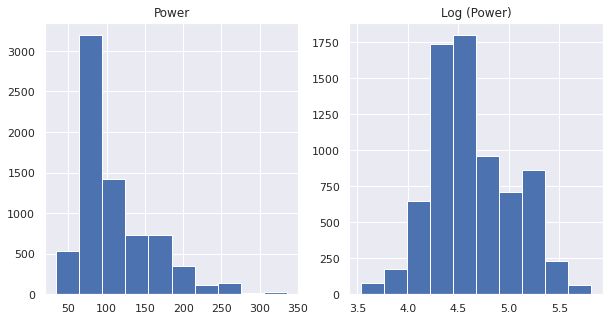

In [ ]:
#Plot the before log transformation of power column
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
plt.title('Power')
plt.hist(data7['Power'])

#After log transformation of power column
plt.subplot(1, 2, 2)
plt.title('Log (Power)')
plt.hist(np.log(data7['Power']))
plt.show()

In [ ]:
#Commit log transformations to dataframe
data7['Power_Log'] = np.log(data['Power'])
data7.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Price_Log,New_Price_Log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Kilometers_Driven_Log,Mileage_Log,Engine_Log,Power_Log
0,2010,72000.0,26.60,998.0,58.16,5.0,5.51,1.75,0.559616,1.706565,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11.184421,3.280911,6.905753,4.063198
1,2015,41000.0,19.67,1582.0,126.20,5.0,16.06,12.50,2.525729,2.776332,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.621327,2.979095,7.366445,4.837868
2,2011,46000.0,18.20,1199.0,88.70,5.0,8.61,4.50,1.504077,2.152924,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.736397,2.901422,7.089243,4.485260
3,2012,87000.0,20.77,1248.0,88.76,7.0,11.27,6.00,1.791759,2.422144,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11.373663,3.033510,7.129298,4.485936
4,2013,40670.0,15.20,1968.0,140.80,5.0,53.14,17.74,2.875822,3.972930,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.613246,2.721295,7.584773,4.947340


In [ ]:
#Select Independent and Dependent Variables
q = data7.drop(["Price"], axis=1)
r = data7["Price"]

In [ ]:
#Splitting the data in 70:30 ratio for train to test data
q_train, q_test, r_train, r_test = train_test_split(q, r, test_size=0.30, random_state=1)

In [ ]:
#Fit model_nine
model_nine = LinearRegression()
model_nine.fit(q_train, r_train)

LinearRegression()

In [ ]:
# Checking model performance on train set
print("Training Performance")
print("\n")
training_performance_9 = model_performance_regression(model_nine, q_train, r_train)
training_performance_9

Training Performance




,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.373259,2.50989,0.821476,0.819268,60.677992


In [ ]:
# Checking model performance on test set
print("Test Performance")
print("\n")
test_performance_9 = model_performance_regression(model_nine, q_test, r_test)
test_performance_9

Test Performance




,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.487227,2.525785,0.809499,0.803909,64.700736


In [ ]:
#Coefficients and intercept of model_nine
coef_data_9 = pd.DataFrame(np.append(model_nine.coef_, model_nine.intercept_), index=q_train.columns.tolist() + ["Intercept"], columns=["Coefficients"],)
coef_data_9

,Coefficients
Year,-0.345237
Kilometers_Driven,0.000006
Mileage,-0.807344
Engine,-0.004602
Power,0.221494
...,...
Kilometers_Driven_Log,-0.957689
Mileage_Log,13.643224
Engine_Log,9.295776
Power_Log,-24.947273


In [ ]:
#Evalation of Feature Importance
imp_9 = pd.DataFrame(data={
    'Attribute': q_train.columns,
    'Importance': model_nine.coef_
})
imp_9 = imp_9.sort_values(by='Importance', ascending = False)
print(imp_9)
print("\n")
print("Slope:" , model_nine.intercept_)

                    Attribute  Importance
29               Make_Bentley   19.059583
50               Make_Porsche   16.018508
59                Mileage_Log   13.643224
42                  Make_Land   13.022708
7                   Price_Log   11.096595
..                        ...         ...
35             Make_Hindustan   -1.205744
24  Owner_Type_Fourth & Above   -1.569455
8               New_Price_Log   -3.499788
20         Fuel_Type_Electric   -4.295970
61                  Power_Log  -24.947273

[62 rows x 2 columns]


Slope: 701.0206130955384


The following are the most important features positively impacting price for this model:

*   Make_Bentley   
*   Make_Porsche 
*   Mileage_Log
*   Make_Land
*   Price_Log

In [ ]:
#Equation of linear regression
equation_nine = "Price = " + str(model_nine.intercept_)
print(equation_nine, end=" ")

for i in range(len(o_train.columns)):
    if i != len(o_train.columns) - 1:
        print("+ (", model_nine.coef_[i],")*(", q_train.columns[i],")",end="  ",)
    else:
        print("+ (", model_nine.coef_[i], ")*(", q_train.columns[i], ")")

Price = 701.0206130955384 + ( -0.345236513009901 )*( Year )  + ( 6.2643625123010136e-06 )*( Kilometers_Driven )  + ( -0.807343787591116 )*( Mileage )  + ( -0.004602017947226589 )*( Engine )  + ( 0.2214944913173087 )*( Power )  + ( -0.37239795037512957 )*( Seats )  + ( 0.1583599121152215 )*( New_Price )  + ( 11.09659471574334 )*( Price_Log )  + ( -3.499788013248052 )*( New_Price_Log )  + ( 0.32046554290832585 )*( Location_Bangalore )  + ( 0.7190248137454347 )*( Location_Chennai )  + ( 0.6352645885655361 )*( Location_Coimbatore )  + ( 0.4485223024879459 )*( Location_Delhi )  + ( 0.3510474080268082 )*( Location_Hyderabad )  + ( 1.066500509858874 )*( Location_Jaipur )  + ( 0.34588261763915185 )*( Location_Kochi )  + ( 0.915764939189631 )*( Location_Kolkata )  + ( 0.14581437888348203 )*( Location_Mumbai )  + ( 0.9856895603519091 )*( Location_Pune )  + ( -0.5119456196308005 )*( Fuel_Type_Diesel )  + ( -4.295970197428156 )*( Fuel_Type_Electric )  + ( -1.0827786525120793 )*( Fuel_Type_LPG )  +

In [ ]:
#Polynomial Feature Transformation
poly = PolynomialFeatures(degree=2, interaction_only=True)
q_train2 = poly.fit_transform(q_train)
q_test2 = poly.fit_transform(q_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(q_train2, r_train)
print(poly_clf.score(q_train2, r_train))

0.9860791826118355


This improved the model from .80 to .98.

In [ ]:
#Out of sample (testing) R^2
print(poly_clf.score(q_test2, r_test))

-2.170507428686274


In [ ]:
#Shape before PolynomialFeature Transformation
print(q_train.shape)
#Shape after Polynomial Transformation
print(q_train2.shape)

(5076, 62)
(5076, 1954)


***Model Ten***

Log values for Power, Engine, Mileage, Kilometers Driven, Price, New Price, and OneHot Encoding on all categorical data. Dependent variable of Price_Log.

In [ ]:
#Select Independent and Dependent Variables
s = data7.drop(["Price_Log"], axis=1)
t = data7["Price_Log"]

In [ ]:
#Splitting the data in 70:30 ratio for train to test data
s_train, s_test, t_train, t_test = train_test_split(s, t, test_size=0.30, random_state=1)

In [ ]:
#Fit model_seven
model_ten= LinearRegression()
model_ten.fit(s_train, t_train)

LinearRegression()

In [ ]:
#Checking model performance on train set
print("Training Performance")
print("\n")
training_performance_10 = model_performance_regression(model_ten, s_train, t_train)
training_performance_10

Training Performance




,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.271011,0.194801,0.883583,0.882143,inf


In [ ]:
#Checking model performance on train set
print("Training Performance\n")
print("\n")
test_performance_10 = model_performance_regression(model_ten, s_test, t_test)
test_performance_10

Training Performance





,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.265734,0.192149,0.8935,0.890376,inf


In [ ]:
#Coefficients and intercept of model_ten
coef_data_10 = pd.DataFrame(np.append(model_ten.coef_, model_ten.intercept_), index=s_train.columns.tolist() + ["Intercept"], columns=["Coefficients"],)
coef_data_10

,Coefficients
Year,6.575722e-02
Kilometers_Driven,-6.035713e-07
Mileage,2.578086e-02
Engine,2.623528e-04
Power,-8.174223e-03
...,...
Kilometers_Driven_Log,1.871747e-02
Mileage_Log,-4.396490e-01
Engine_Log,-3.510103e-01
Power_Log,1.171843e+00


In [ ]:
#Evalation of Feature Importance
imp_10 = pd.DataFrame(data={
    'Attribute': s_train.columns,
    'Importance': model_ten.coef_
})
imp_10 = imp_10.sort_values(by='Importance', ascending = False)
print(imp_10)
print("\n")
print("Slope:" , model_ten.intercept_)

                    Attribute  Importance
61                  Power_Log    1.171843
35             Make_Hindustan    0.842296
20         Fuel_Type_Electric    0.665951
8               New_Price_Log    0.241743
24  Owner_Type_Fourth & Above    0.194736
..                        ...         ...
59                Mileage_Log   -0.439649
42                  Make_Land   -0.492126
54                  Make_Tata   -0.510289
30             Make_Chevrolet   -0.522357
38                 Make_Isuzu   -0.710624

[62 rows x 2 columns]


Slope: -133.0754973092163


The following are the most important features positively impacting price for this model:

*   Power_Log    
*   Make_Hindustan 
*   Fuel_Type_Electric
*   New_Price_Log
*   Owner_Type_Fourth & Above

In [ ]:
#Equation of linear regression
equation_ten = "Price = " + str(model_ten.intercept_)
print(equation_nine, end=" ")

for i in range(len(s_train.columns)):
    if i != len(s_train.columns) - 1:
        print("+ (", model_ten.coef_[i],")*(", s_train.columns[i],")",end="  ",)
    else:
        print("+ (", model_ten.coef_[i], ")*(", s_train.columns[i], ")")

Price = 701.0206130955384 + ( 0.06575722220248134 )*( Year )  + ( -6.03571252069017e-07 )*( Kilometers_Driven )  + ( 0.02578085750136873 )*( Mileage )  + ( 0.00026235276155905235 )*( Engine )  + ( -0.008174222594045015 )*( Power )  + ( 0.025114935298621133 )*( Seats )  + ( -0.001967345794833285 )*( New_Price )  + ( 0.042613948610758956 )*( Price )  + ( 0.2417433136574921 )*( New_Price_Log )  + ( 0.023938906536849325 )*( Location_Bangalore )  + ( -0.01181605312085282 )*( Location_Chennai )  + ( 0.010957986492713966 )*( Location_Coimbatore )  + ( -0.0571916447356933 )*( Location_Delhi )  + ( 0.03270380445343879 )*( Location_Hyderabad )  + ( -0.06484944406448023 )*( Location_Jaipur )  + ( -0.04176297183037943 )*( Location_Kochi )  + ( -0.14041642086862424 )*( Location_Kolkata )  + ( -0.025574484346933712 )*( Location_Mumbai )  + ( -0.0602836757111993 )*( Location_Pune )  + ( 0.06709635462380709 )*( Fuel_Type_Diesel )  + ( 0.6659509622711997 )*( Fuel_Type_Electric )  + ( 0.1104809767200102

In [ ]:
#Polynomial Feature Transformation
poly = PolynomialFeatures(degree=2, interaction_only=True)
s_train2 = poly.fit_transform(s_train)
s_test2 = poly.fit_transform(s_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(s_train2, t_train)
print(poly_clf.score(s_train2, t_train))

0.9901964541513167


This improved the model from .89 to .99.

In [ ]:
#Out of sample (testing) R^2
print(poly_clf.score(q_test2, r_test))

-0.5646113344370383


In [ ]:
#Shape before PolynomialFeature Transformation
print(s_train.shape)
#Shape after Polynomial Transformation
print(s_train2.shape)

(5076, 62)
(5076, 1954)


**Conclusion and Recommendations**

The best performing model was model 10.

In [ ]:
print("Model 10 Test Performance")
test_performance_10

Model 10 Test Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.265734,0.192149,0.8935,0.890376,inf


This model scored 89% of the variance in the dependent variable that the independent variables explain collectively. The most important features of this model were:

*   Power_Log
*   Make_Hindustan
*   Fuel_Type_Electric
*   New_Price_Log
*   Owner_Type_Fourth & Above

The most amount of cars sold were between 3.50 - 5.00. The more expensive cars were the luxary brands like Lamborghini, Porshe, Land Rover, Audi, and Bentley. In many of the models built, it was noticed that make has an impact on price. Model 8 - which performed really well had (4) different makes in the features, positively contribiting to the success of the model:


In [ ]:
print("Model 8 Test Performance")
test_performance_8

Model 8 Test Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.27738,0.200248,0.883961,0.880613,inf


Lower end cars had more of a negative impact on the price. Higher end cars appeared to have more of a positive impact, but the dataset did not contain many higher end cars - so this may not be a fair representation. Dealerships should look for more mid-ranged valued cars for more of an impact on sales.

Another interesting observation is that while the majority of the cars in the dataset are of petrol and diesel fuel types, electric cars had a positive effect on the price model. Perhaps this is a good opportunity for dealers to start offering more selections in the electric car market - especially since fuel prices comtinue to rise.

In many of the models built, Location_Kolkata had a negative effect on price. Additionally, we also observed there was a good coorelation bewteen price and new price. Given this relationship, it is wise for the delerships to understand that as the price of new cars get higher, used car prices can also increase.

Additionally, both the mileage and kilometers driven have an inverse relationship - as the mileage and kilometers increase, the price drops. This makes sense as buyers are seeking cars that offer km/kg and have less mileage. Customers should expect to pay more for these cars.

<hr>

**Final Recoomendations**

These recommendations will be pragmatic. The best performing model used the log of price. In reality, this will mean nothing to the sales people. Dealers should look to:

*   Coimbatore, Banglore, and Kochi as these locations have the highest mean price for cars sold. Perhaps increase marketing efforts here to increase sales and evaluate whether locations that have a negative impact on price (such as Kolkata) should remain open.
*   Offer more of an inventory of electric cars at the Coimbatore, Banglore, and Kochias locations as this had a positive impact on price.
*   Cars 2016-newer yield higher prices, but many customers have cars that are between 2012-2015. Look to load your inventory with cars that are only 2012 or newer as these are the most desirable.
*   While more customers have manual transmission cars, automatic cars almost always yield higher prices (except in the case of Land Rovers). Since traffic is always a pain point, acquiring more automatic cars (which are also more fuel efficient) and marketing to customers pain regarding traffic will increase price.
* Dealerships should look to acquire makes like Maruti, Hyundai, Honda, Toyota, and Mercedes-Benz's (older than 2012) as these are the most popular selling brands.
